<a href="https://colab.research.google.com/github/an-42-an/uidai1/blob/ananya/uidai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data


In [2]:
!git clone https://github.com/an-42-an/uidai1.git
%cd uidai1
!ls

Cloning into 'uidai1'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 37 (delta 16), reused 21 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 43.41 MiB | 9.76 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Updating files: 100% (15/15), done.
/content/uidai1
api_data_aadhar_biometric    api_data_aadhar_enrolment	uidai1.ipynb
api_data_aadhar_demographic  README.md


In [3]:
!ls -R

.:
api_data_aadhar_biometric    api_data_aadhar_enrolment	uidai1.ipynb
api_data_aadhar_demographic  README.md

./api_data_aadhar_biometric:
bio1.csv  bio2.csv  bio3.csv  bio4.csv

./api_data_aadhar_demographic:
demo1.csv  demo2.csv  demo3.csv  demo4.csv  demo5.csv

./api_data_aadhar_enrolment:
enrol1.csv  enrol2.csv	enrol3.csv


In [4]:
import pandas as pd

In [5]:
enrol="api_data_aadhar_enrolment"
enrol1=pd.read_csv(f'{enrol}/enrol1.csv')
enrol1.head()

date          state          district  pincode  age_0_5  age_5_17  \
0  02-03-2025      Meghalaya  East Khasi Hills   793121       11        61   
1  09-03-2025      Karnataka   Bengaluru Urban   560043       14        33   
2  09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3  09-03-2025  Uttar Pradesh           Aligarh   202133       62        29   
4  09-03-2025      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  
0              37  
1              39  
2              12  
3              15  
4              21

In [6]:
enrol1.dtypes

date              object
state             object
district          object
pincode            int64
age_0_5            int64
age_5_17           int64
age_18_greater     int64
dtype: object

In [7]:
bio="api_data_aadhar_biometric"
bio1=pd.read_csv(f'{bio}/bio1.csv')
bio1.head()

date              state      district  pincode  bio_age_5_17  \
0  01-03-2025            Haryana  Mahendragarh   123029           280   
1  01-03-2025              Bihar     Madhepura   852121           144   
2  01-03-2025  Jammu and Kashmir         Punch   185101           643   
3  01-03-2025              Bihar       Bhojpur   802158           256   
4  01-03-2025         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  
0          577  
1          369  
2         1091  
3          980  
4          815

In [8]:
demo="api_data_aadhar_demographic"
demo1=pd.read_csv(f'{demo}/demo1.csv')
demo1.head()

date           state    district  pincode  demo_age_5_17  \
0  01-03-2025   Uttar Pradesh   Gorakhpur   273213             49   
1  01-03-2025  Andhra Pradesh    Chittoor   517132             22   
2  01-03-2025         Gujarat      Rajkot   360006             65   
3  01-03-2025  Andhra Pradesh  Srikakulam   532484             24   
4  01-03-2025       Rajasthan     Udaipur   313801             45   

   demo_age_17_  
0           529  
1           375  
2           765  
3           314  
4           785

In [9]:
def sp_low(df,cols):
  df[cols]=df[cols].apply(lambda s:s.astype(str).str.replace(' ','',regex=False).str.lower())
  return df

In [10]:
def state_proc(df):
  keys = {
    "andaman": "andamanandnicobarislands",
    "andhra": "andhrapradesh",
    "arunachal": "arunachalpradesh",
    "assam": "assam",
    "bihar": "bihar",
    "chandigarh": "chandigarh",
    "chhat": "chhattisgarh",
    "delhi": "delhi",
    "goa": "goa",
    "gujarat": "gujarat",
    "haryana": "haryana",
    "himachal": "himachalpradesh",
    "jharkhand": "jharkhand",
    "karnataka": "karnataka",
    "kerala": "kerala",
    "ladakh": "ladakh",
    "lakshadweep": "lakshadweep",
    "madhya": "madhyapradesh",
    "maharashtra": "maharashtra",
    "manipur": "manipur",
    "meghalaya": "meghalaya",
    "mizoram": "mizoram",
    "nagaland": "nagaland",
    "odisha": "odisha",
    "orissa": "odisha",
    "pudu": "puducherry",
    "pond": "puducherry",
    "punjab": "punjab",
    "rajasthan": "rajasthan",
    "sikkim": "sikkim",
    "tamilnadu": "tamilnadu",
    "telangana": "telangana",
    "tripura": "tripura",
    "uttarpradesh": "uttarpradesh",
    "khand": "uttarakhand",
    "chal": "uttarakhand",
    "westb": "westbengal",
    "jammu": "jammuandkashmir",
    "dadra": "dadranagarhavelidamandiu",
    "daman": "dadranagarhavelidamandiu",
    "balanagar": "telangana",
    "jaipur": "rajasthan",
    "madanapalle": "andhrapradesh",
    "darbhanga": "bihar",
    "puttenahalli": "karnataka",
    "nagpur": "maharashtra",
    "rajaannamalaipuram": "tamilnadu"
  }

  def map_state(val):
    for k in keys:
        if k in val:
            return keys[k]
    return val

  df['state'] = df['state'].astype(str).apply(map_state)
  return df

In [11]:
import glob
import matplotlib.pyplot as plt

In [12]:
biofiles=glob.glob("api_data_aadhar_biometric/bio*.csv")
biodf=pd.concat(pd.read_csv(f) for f in biofiles)
biodf['date']=pd.to_datetime(biodf['date'],dayfirst=True)
biodf['year_month']=biodf['date'].dt.strftime('%Y-%m')
biodf=state_proc(sp_low(biodf,['state','district']))
biodf=biodf[biodf['state']!='100000']
bioage=[c for c in biodf.columns if 'age' in c]
biog=biodf.groupby(['state','year_month'])[bioage].sum().reset_index()

In [13]:
bioym=biodf['year_month'].unique()
bioym

array(['2025-09', '2025-10', '2025-11', '2025-12', '2025-03', '2025-04',
       '2025-05', '2025-06', '2025-07'], dtype=object)

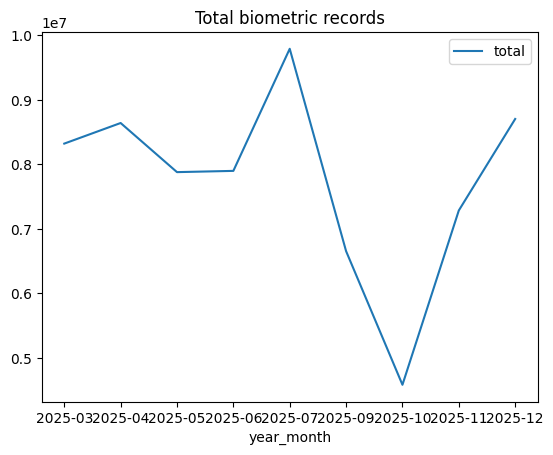

In [14]:
tot=biodf.groupby('year_month')[bioage].sum().sum(axis=1).reset_index(name='total')

ax=tot.plot(x='year_month',y='total',title='Total biometric records')
plt.show()


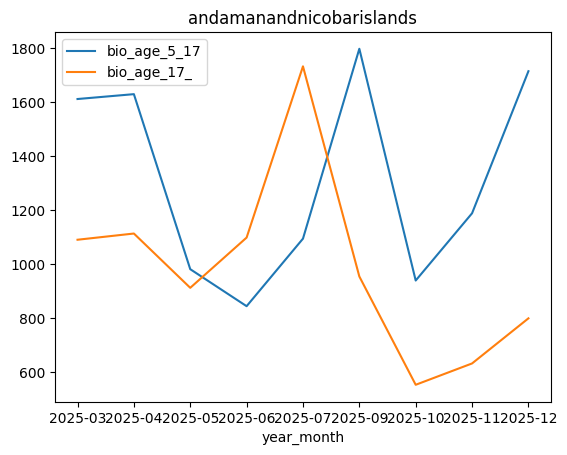

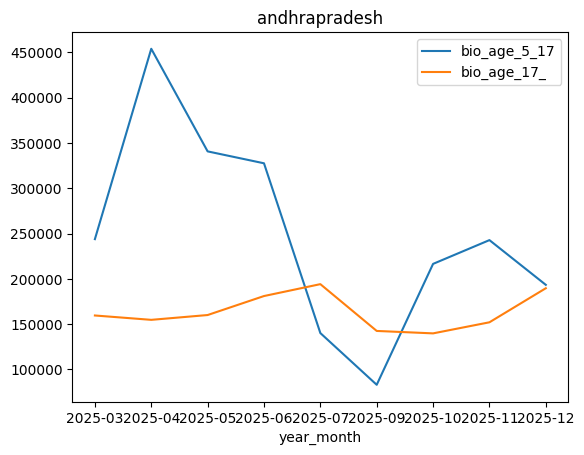

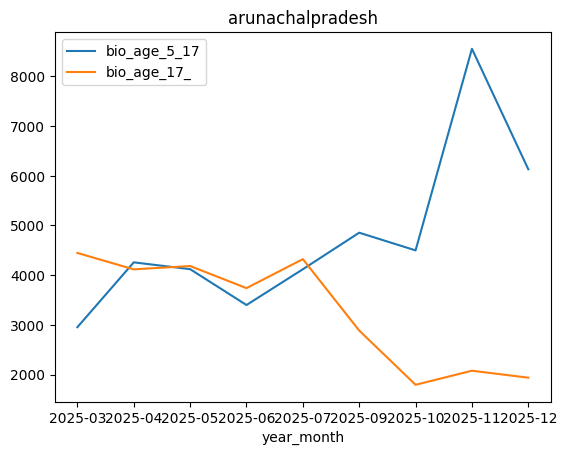

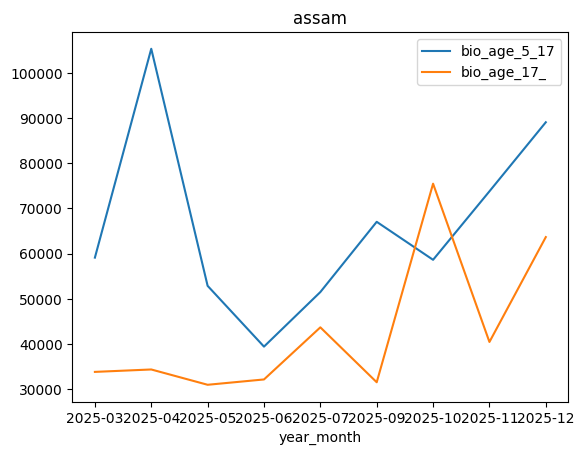

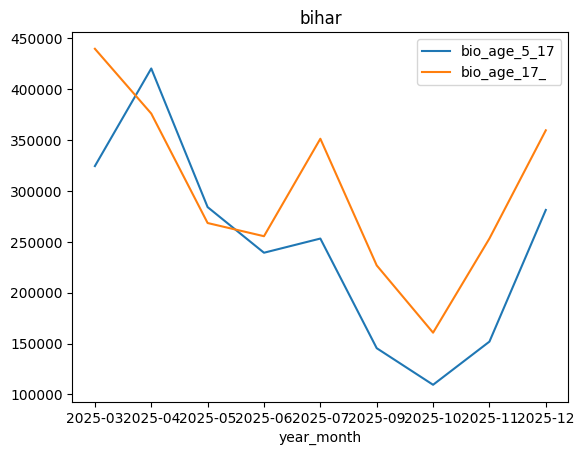

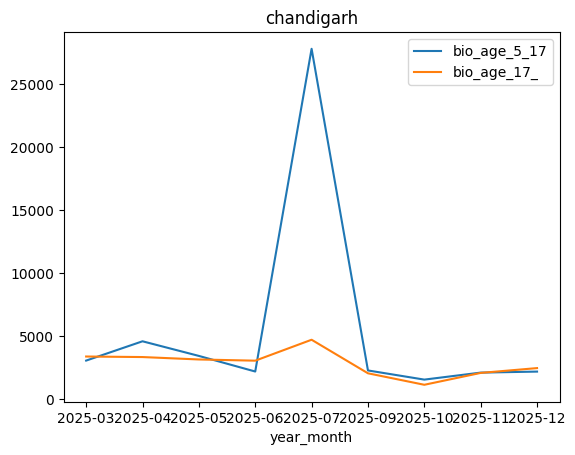

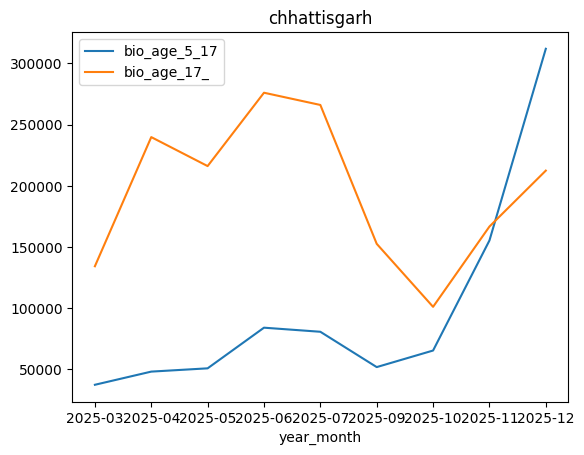

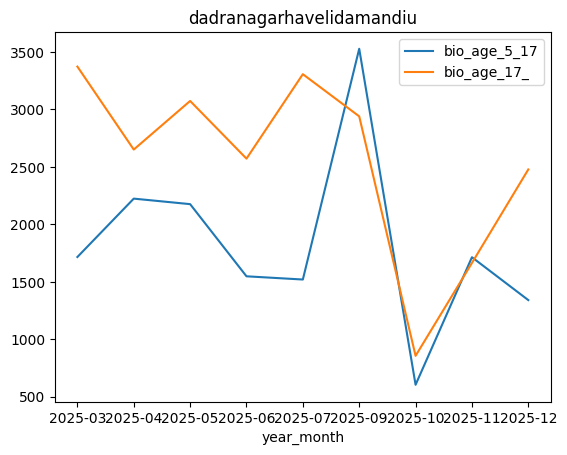

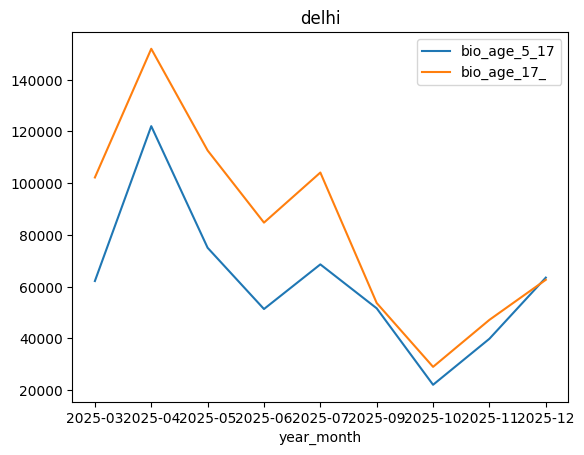

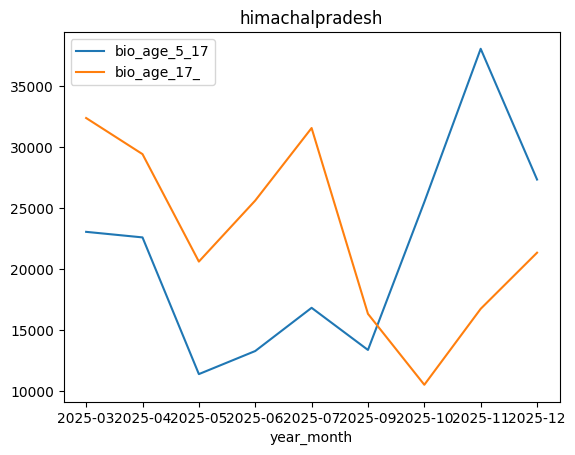

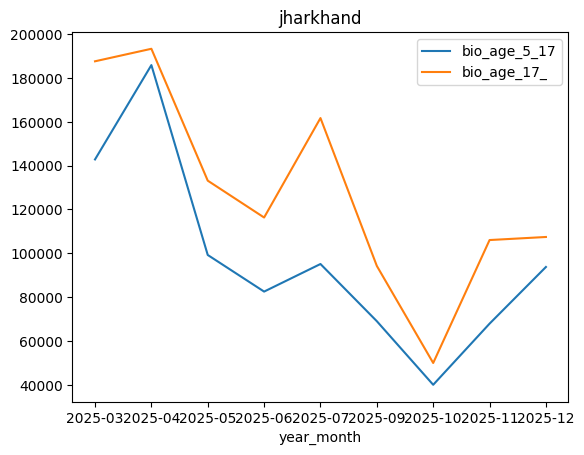

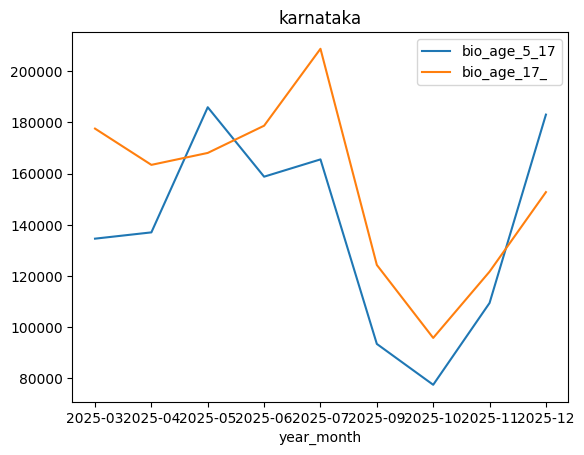

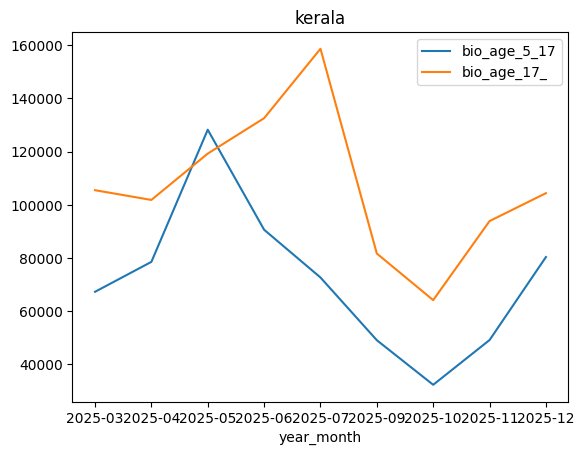

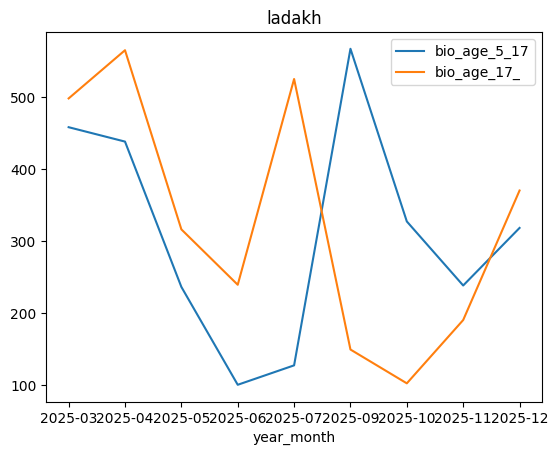

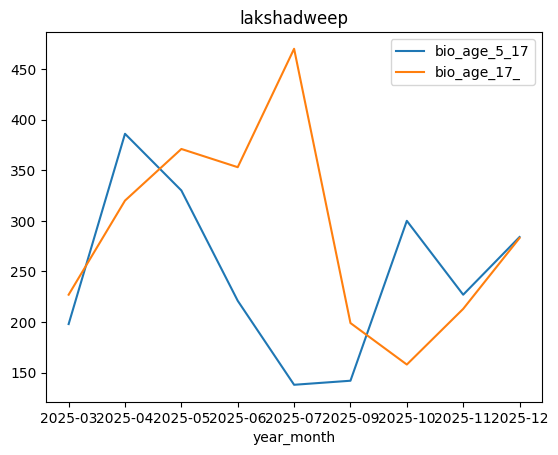

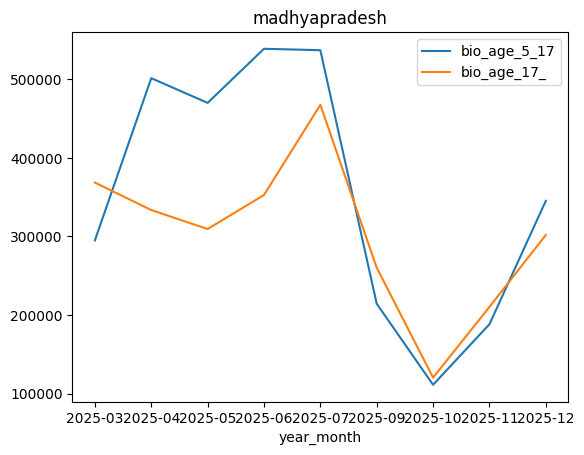

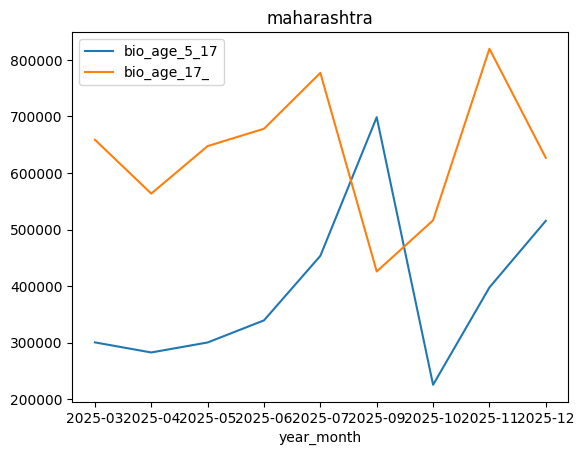

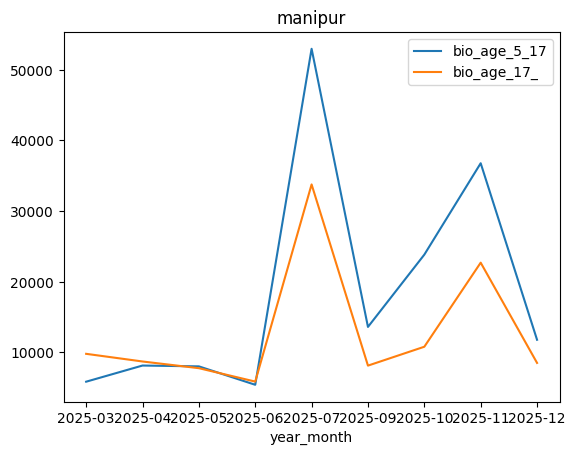

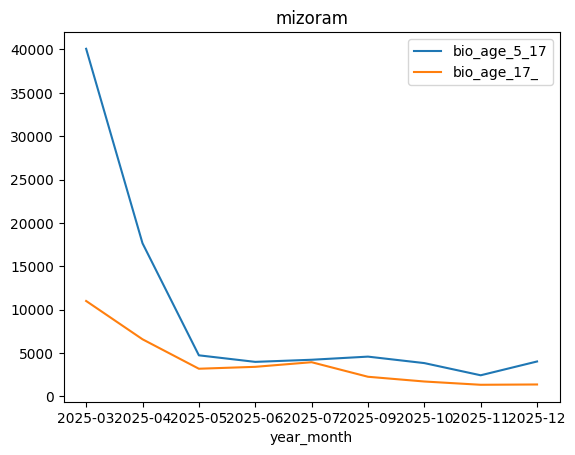

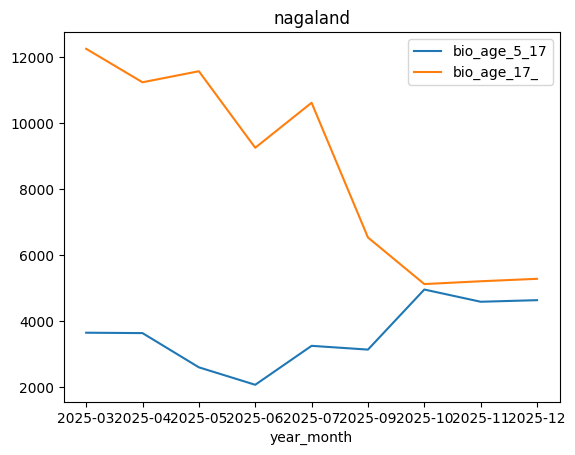

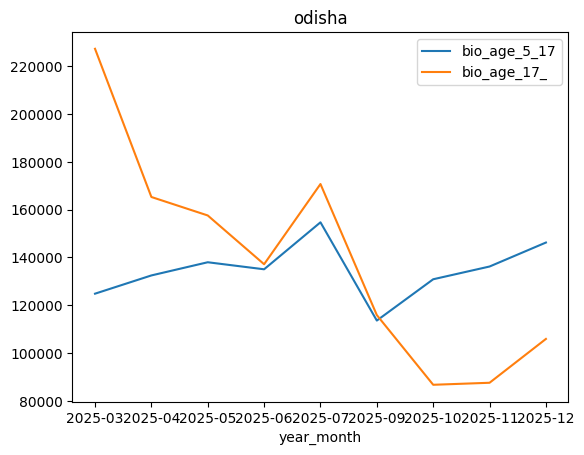

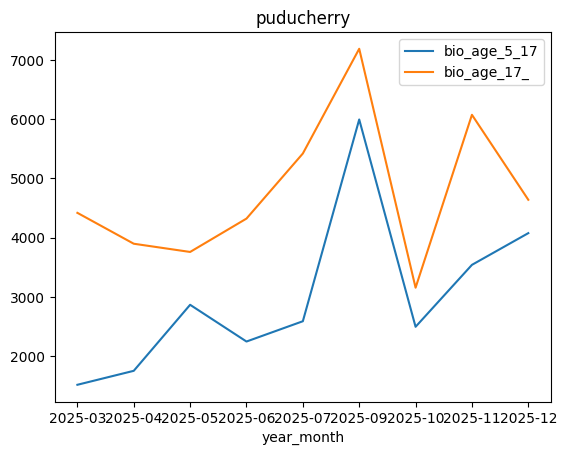

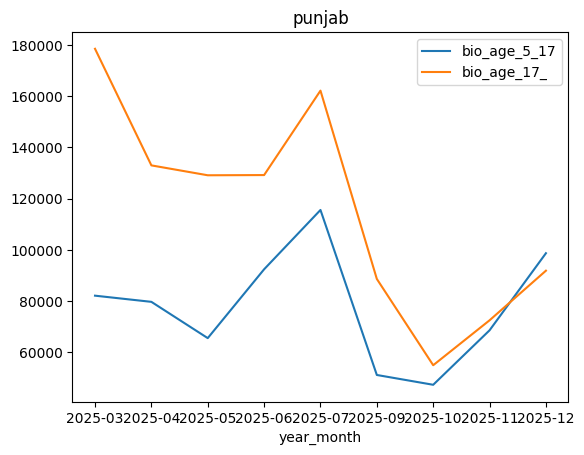

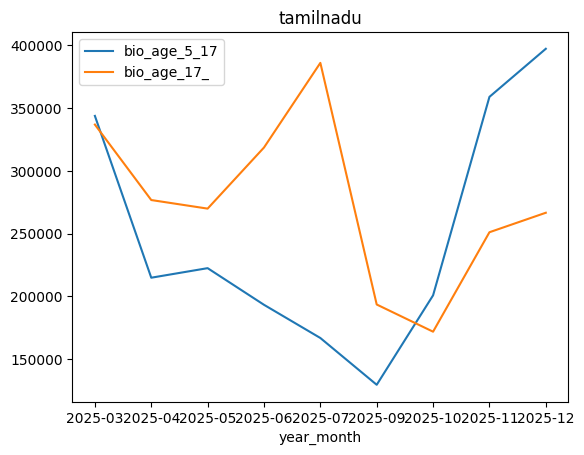

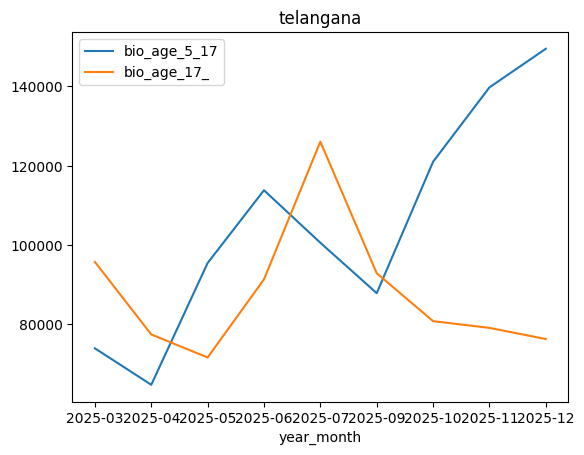

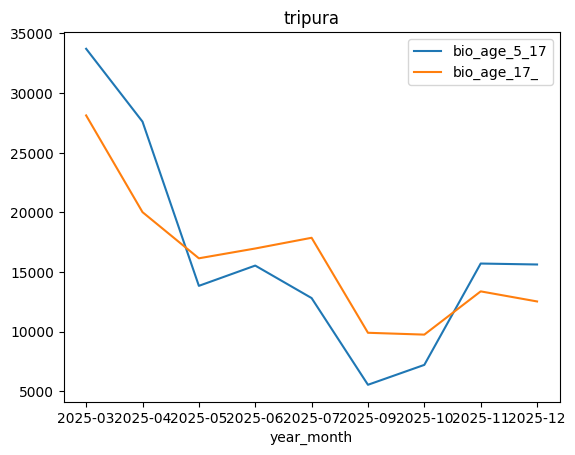

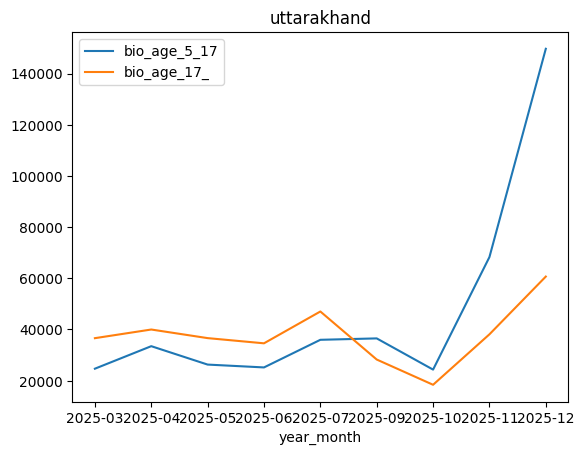

In [15]:
for state,d in biog.groupby('state'):
  d.plot(x='year_month',y=bioage,title=state)
  plt.show()

In [16]:
enrolfiles=glob.glob("api_data_aadhar_enrolment/enrol*.csv")
enroldf=pd.concat(pd.read_csv(f) for f in enrolfiles)
enroldf['date']=pd.to_datetime(enroldf['date'],dayfirst=True)
enroldf['year_month']=enroldf['date'].dt.strftime('%Y-%m')
enroldf=state_proc(sp_low(enroldf,['state','district']))
enroldf=enroldf[enroldf['state']!='100000']
enrolage=[c for c in enroldf.columns if 'age' in c]
enrolg=enroldf.groupby(['state','year_month'])[enrolage].sum().reset_index()

In [17]:
enrolym=enroldf['year_month'].unique()
enrolym

array(['2025-12', '2025-03', '2025-04', '2025-05', '2025-06', '2025-07',
       '2025-09', '2025-10', '2025-11'], dtype=object)

In [18]:
enroldf['state'].unique()

array(['karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhyapradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamilnadu', 'telangana', 'tripura', 'uttarpradesh', 'uttarakhand',
       'westbengal', 'andhrapradesh', 'arunachalpradesh', 'assam',
       'bihar', 'chandigarh', 'chhattisgarh', 'dadranagarhavelidamandiu',
       'delhi', 'goa', 'gujarat', 'haryana', 'himachalpradesh',
       'jammuandkashmir', 'jharkhand', 'andamanandnicobarislands'],
      dtype=object)

In [19]:
tot=enroldf.groupby('year_month')[enrolage].sum().sum(axis=1).reset_index(name='total')

ax=tot.plot(x='year_month',y='total',title='Total enrolment records')
plt.show()

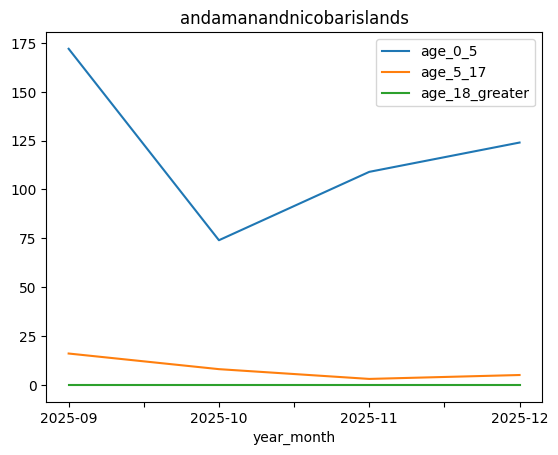

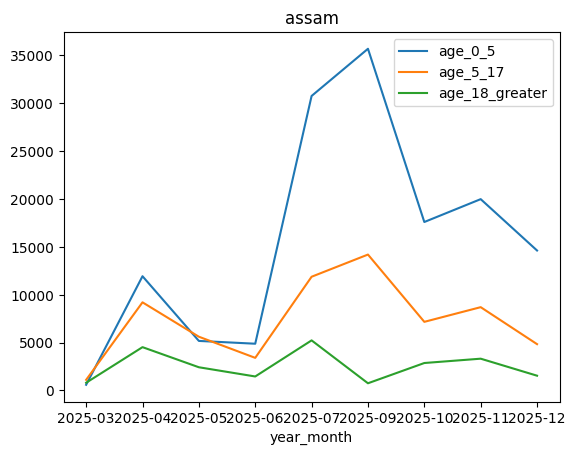

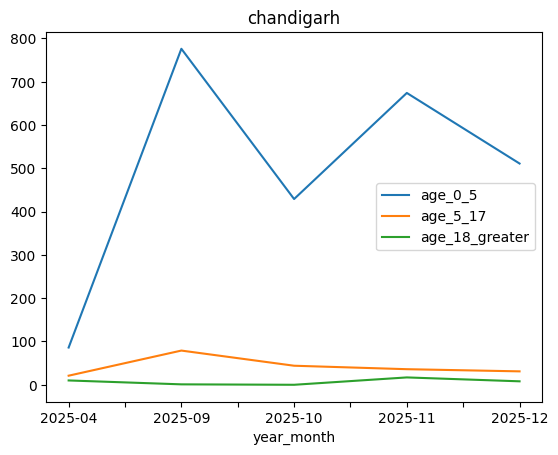

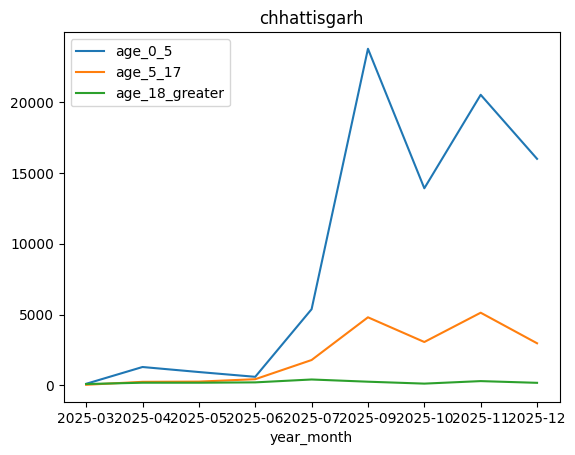

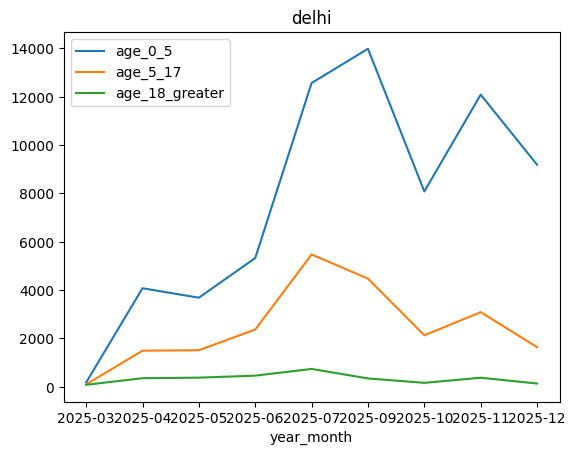

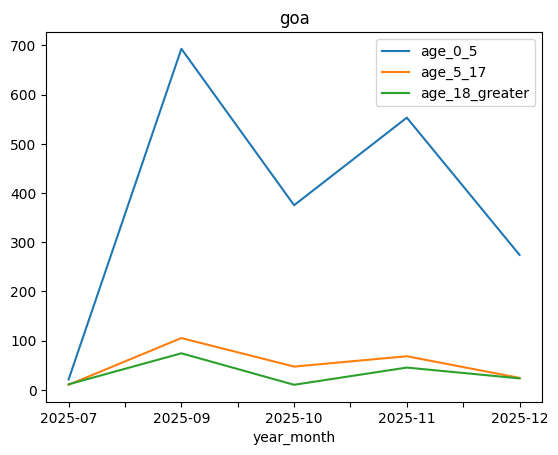

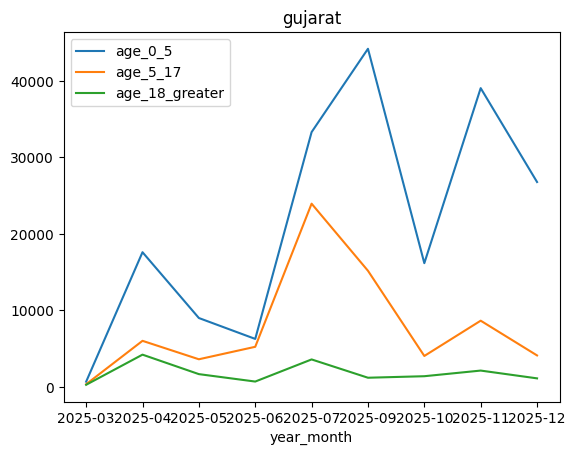

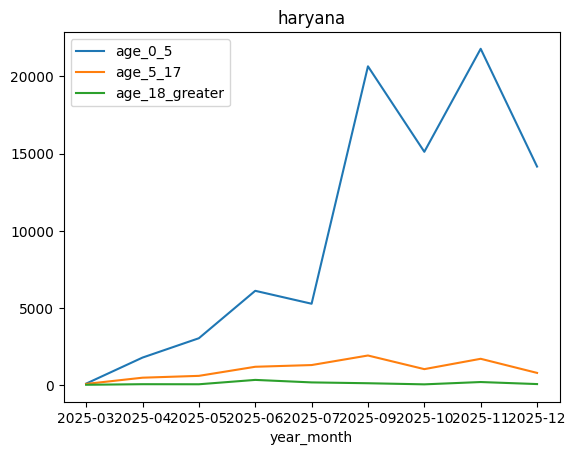

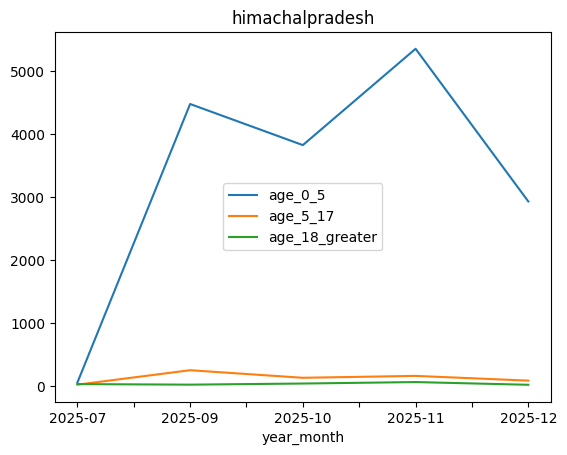

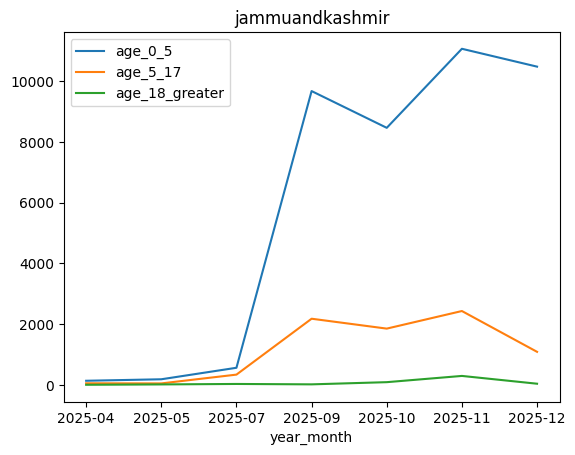

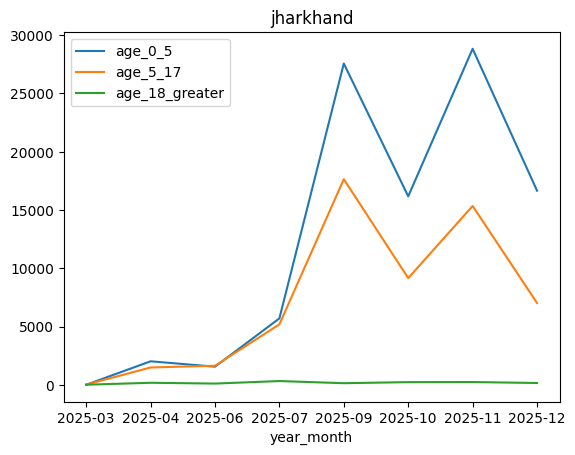

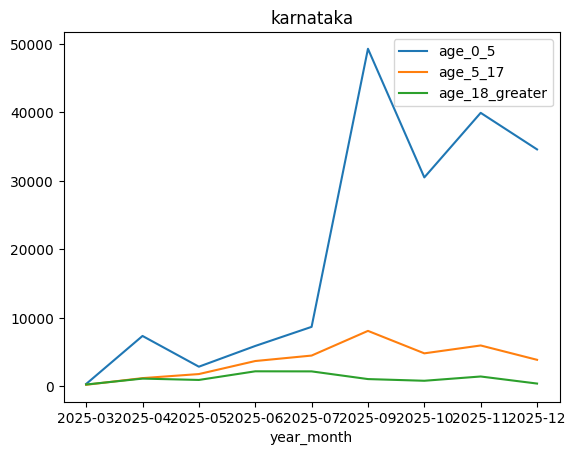

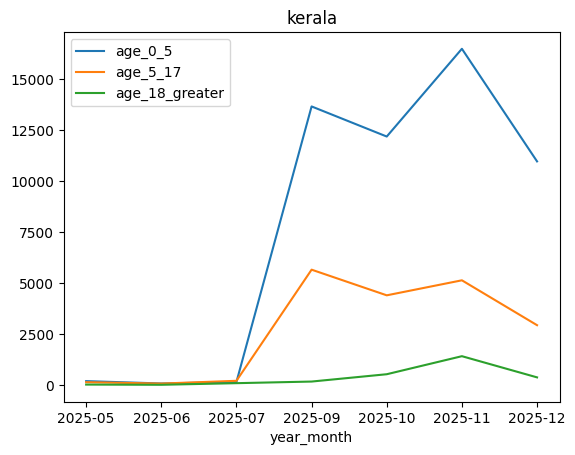

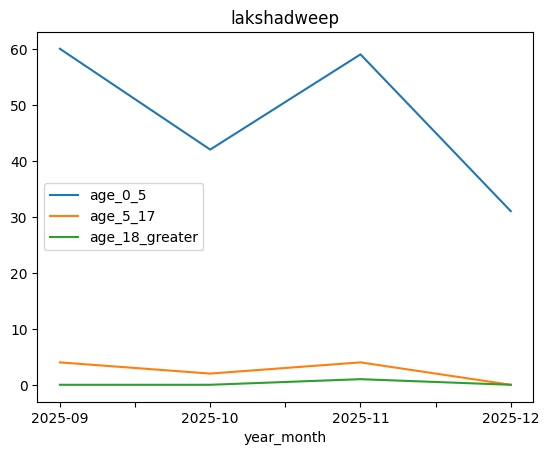

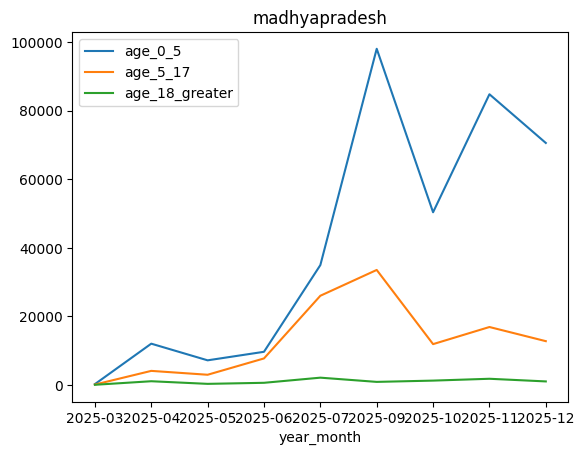

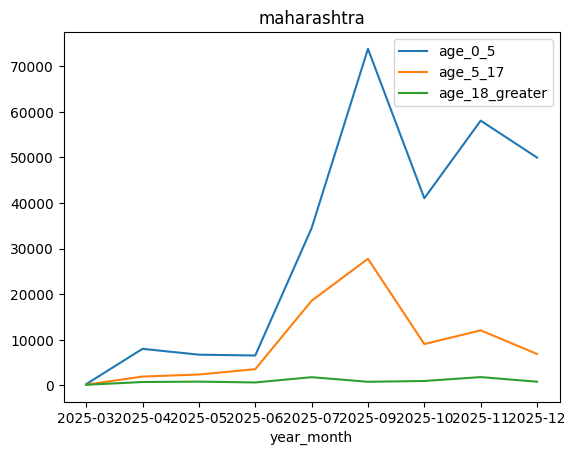

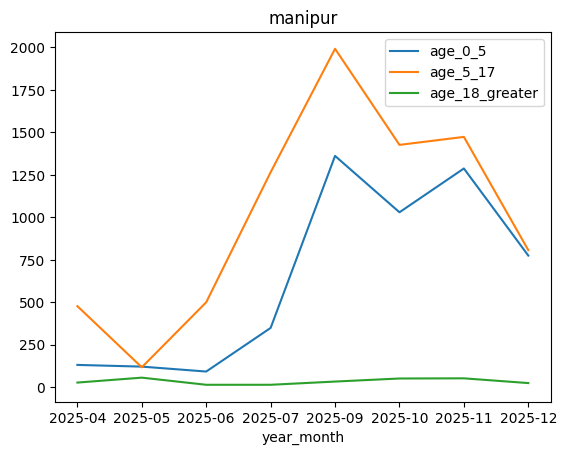

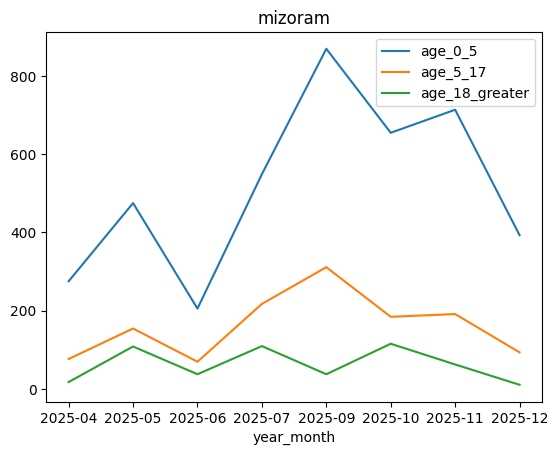

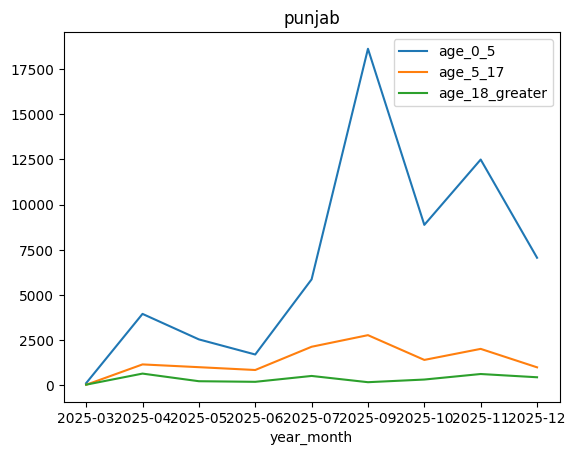

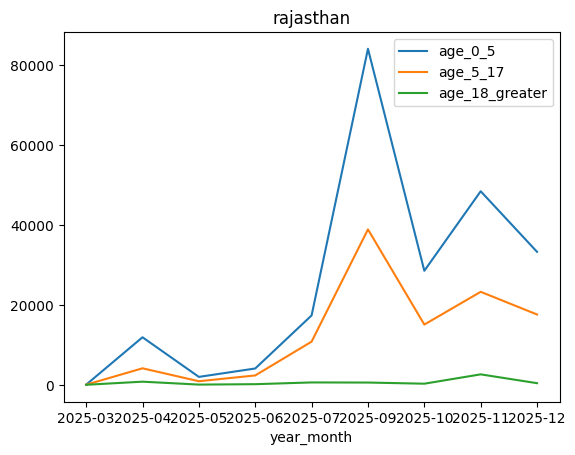

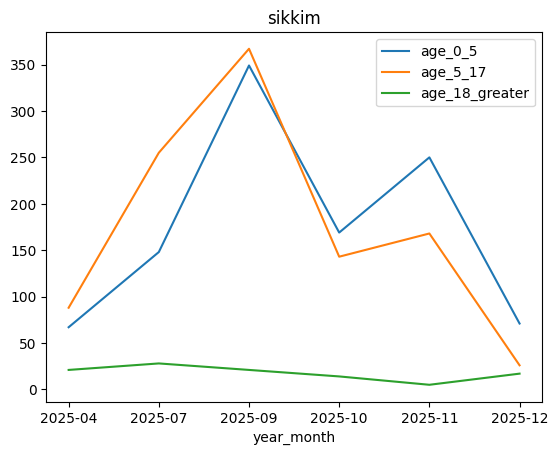

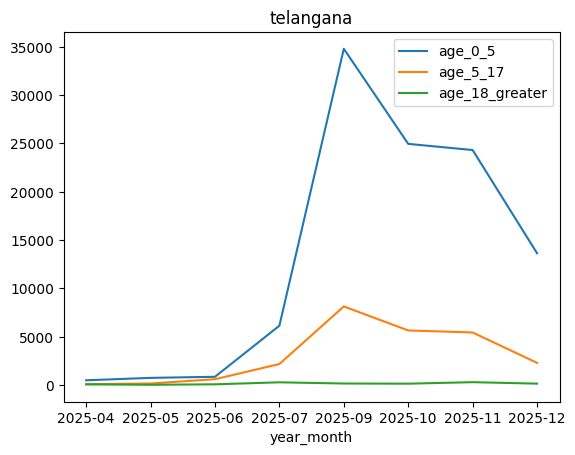

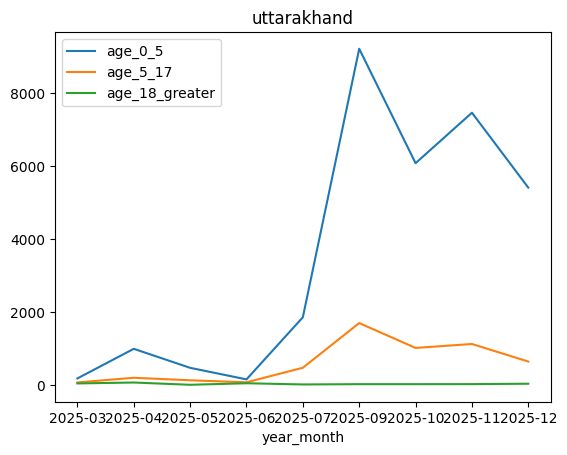

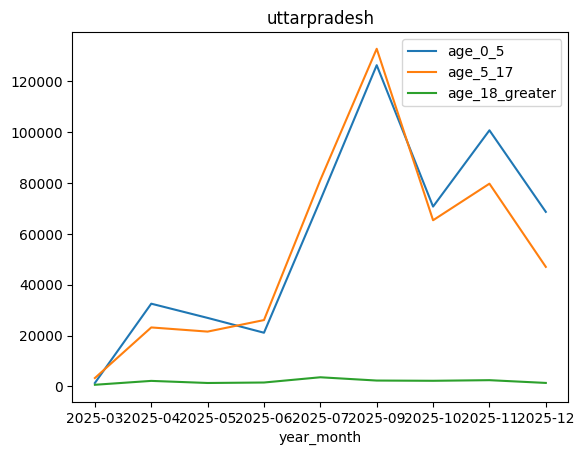

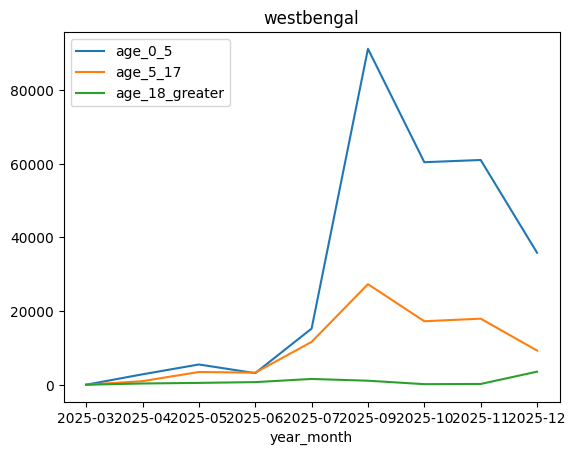

In [20]:
for state,d in enrolg.groupby('state'):
  d.plot(x='year_month',y=enrolage,title=state)
  plt.show()

In [21]:
demofiles=glob.glob("api_data_aadhar_demographic/demo*.csv")
demodf=pd.concat(pd.read_csv(f) for f in demofiles)
demodf['date']=pd.to_datetime(demodf['date'],dayfirst=True)
demodf['year_month']=demodf['date'].dt.strftime('%Y-%m')
demodf=state_proc(sp_low(demodf,['state','district']))
demodf=demodf[demodf['state']!='100000']
demoage=[c for c in demodf.columns if 'age' in c]
demog=demodf.groupby(['state','year_month'])[demoage].sum().reset_index()

In [22]:
demoym=demodf['year_month'].unique()
demoym

array(['2025-09', '2025-10', '2025-11', '2025-12', '2025-03', '2025-04',
       '2025-05', '2025-06', '2025-07'], dtype=object)

In [23]:
demodf['state'].unique()

array(['maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'tamilnadu',
       'telangana', 'tripura', 'uttarpradesh', 'sikkim', 'uttarakhand',
       'westbengal', 'andamanandnicobarislands', 'andhrapradesh',
       'arunachalpradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadranagarhavelidamandiu', 'delhi', 'goa', 'gujarat', 'haryana',
       'himachalpradesh', 'jammuandkashmir', 'jharkhand', 'karnataka',
       'kerala', 'lakshadweep', 'madhyapradesh', 'ladakh'], dtype=object)

In [24]:
demodf['district'].unique()

array(['satara', 'sindhudurg', 'solapur', 'thane', 'wardha', 'washim',
       'washim*', 'yavatmal', 'chandel', 'churachandpur', 'imphaleast',
       'imphalwest', 'senapati', 'thoubal', 'ukhrul', 'eastkhasihills',
       'northgarohills', 'ribhoi', 'southwestgarohills', 'westgarohills',
       'westjaintiahills', 'aizawl', 'champhai', 'hnahthial', 'lawngtlai',
       'mamit', 'saiha', 'chumukedima', 'dimapur', 'mokokchung', 'mon',
       'peren', 'phek', 'shamator', 'zunheboto', 'nuapada', 'angul',
       'anugul', 'balangir', 'baleshwar', 'baleswar', 'bargarh', 'baudh',
       'bhadrak', 'boudh', 'cuttack', 'debagarh', 'dhenkanal', 'gajapati',
       'ganjam', 'jajpur', 'jagatsinghapur', 'jagatsinghpur', 'jajapur',
       'jharsuguda', 'kalahandi', 'kandhamal', 'kendrapara', 'kendujhar',
       'khorda', 'khordha', 'koraput', 'malkangiri', 'mayurbhanj',
       'nabarangapur', 'nayagarh', 'puri', 'rayagada', 'sambalpur',
       'sonapur', 'subarnapur', 'sundargarh', 'sundergarh', 'kar

In [25]:
tot=demodf.groupby('year_month')[demoage].sum().sum(axis=1).reset_index(name='total')

ax=tot.plot(x='year_month',y='total',title='Total demographic records')
plt.show()

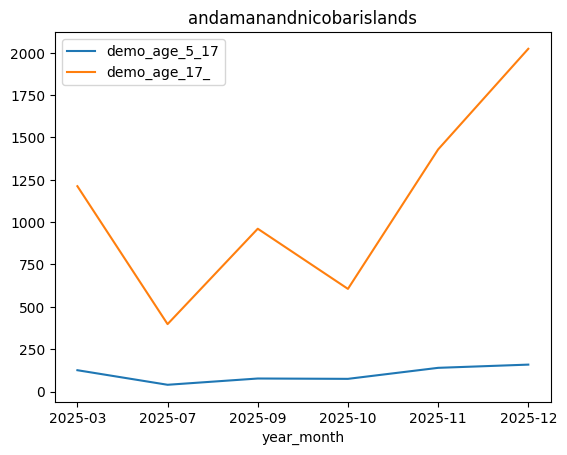

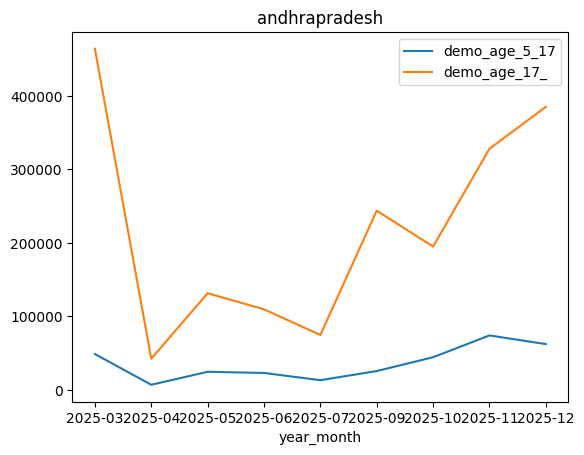

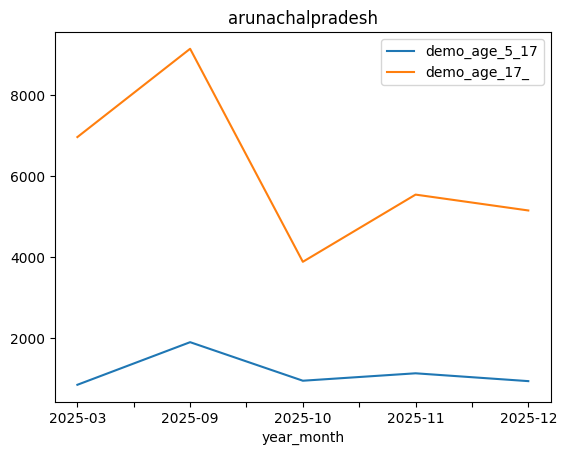

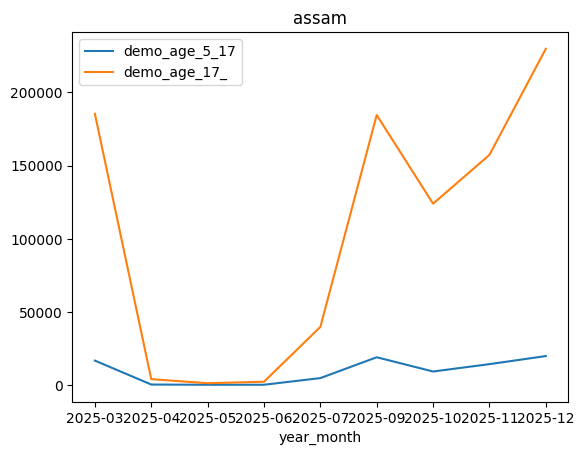

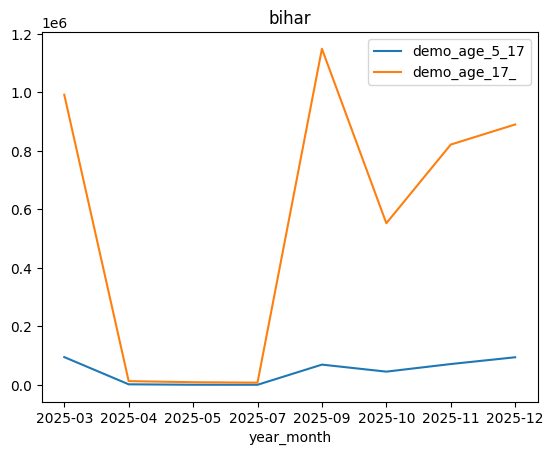

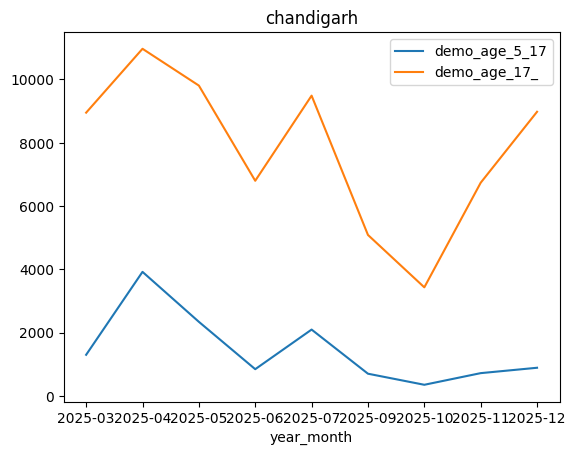

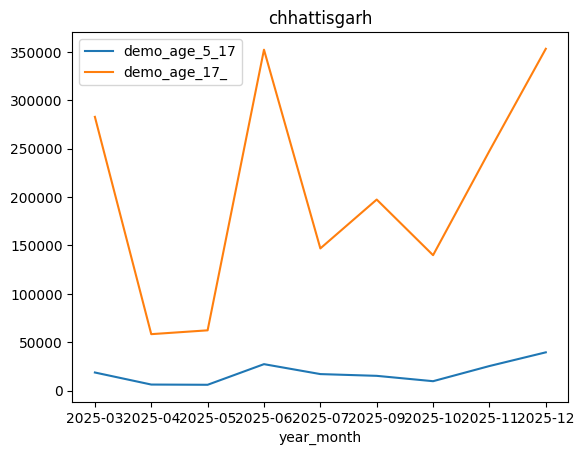

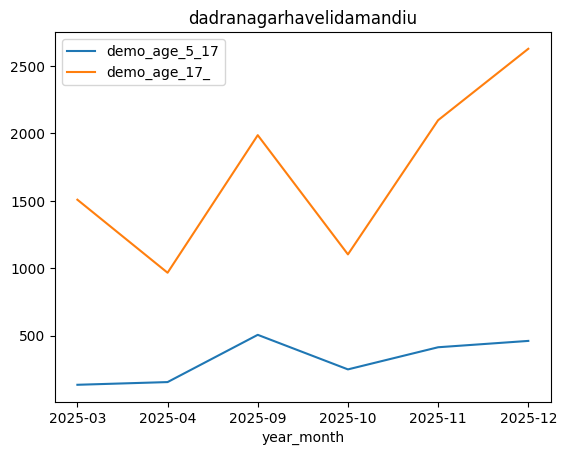

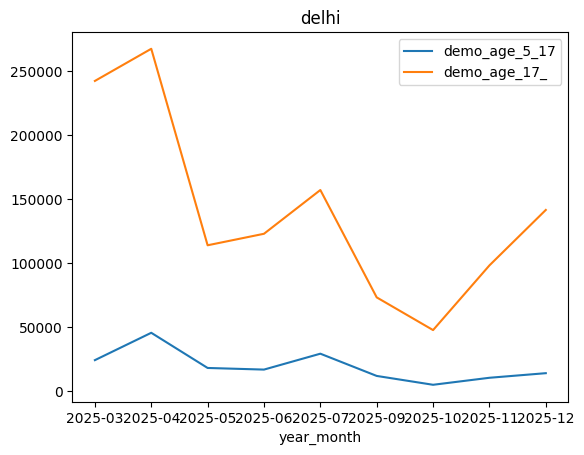

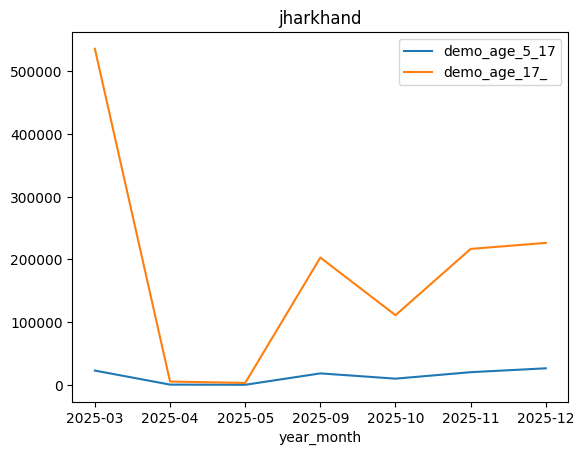

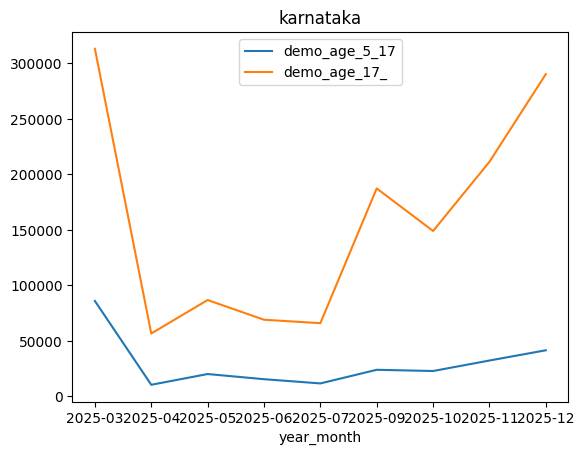

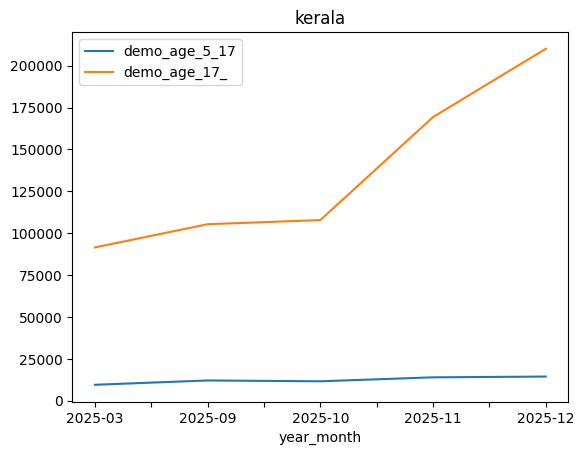

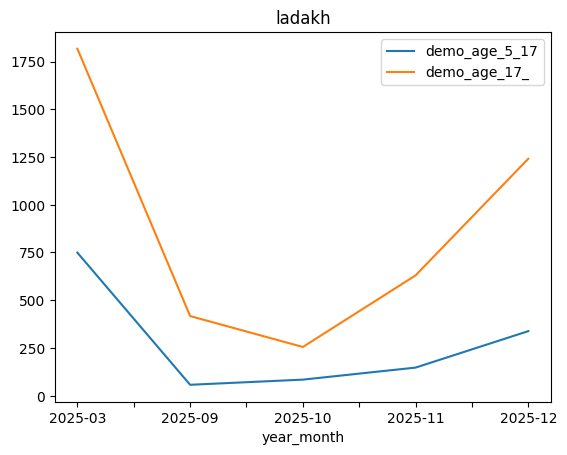

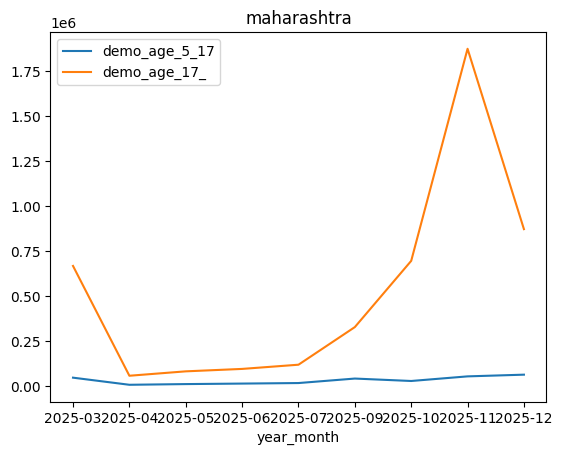

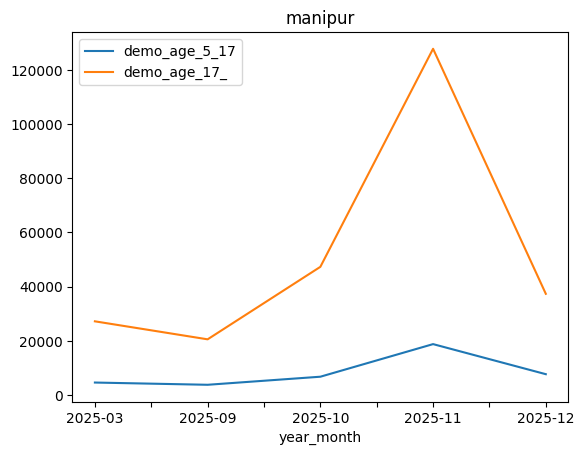

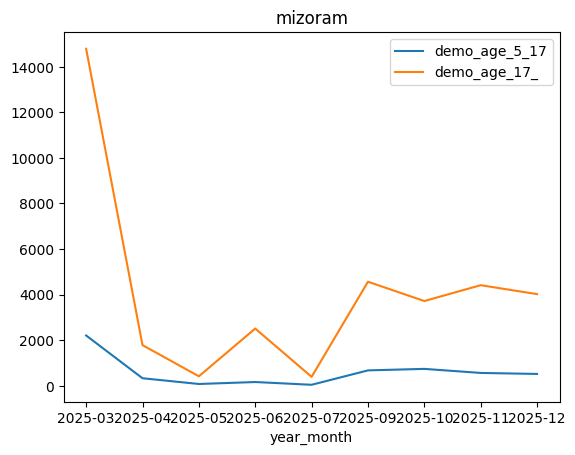

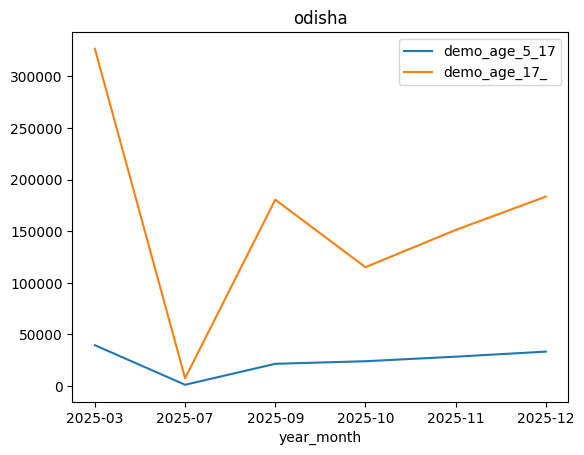

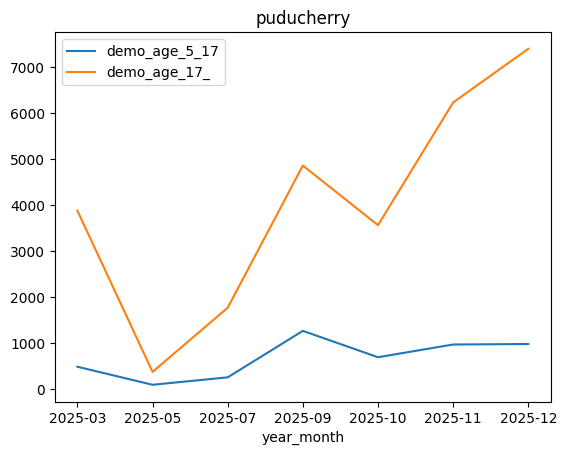

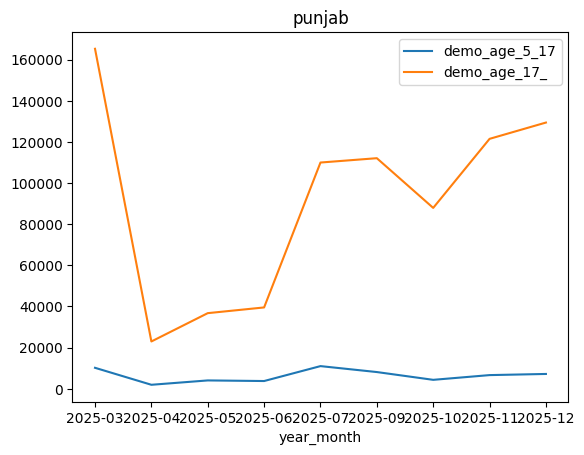

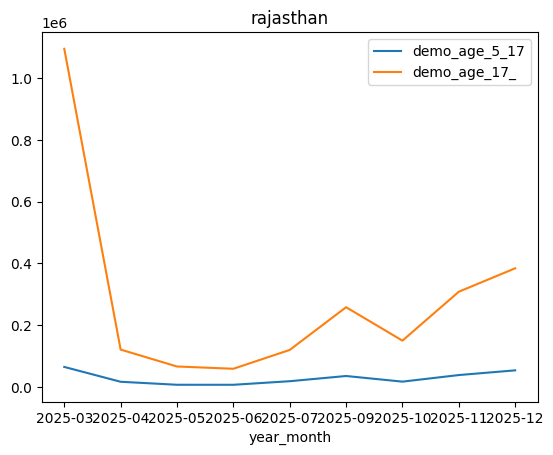

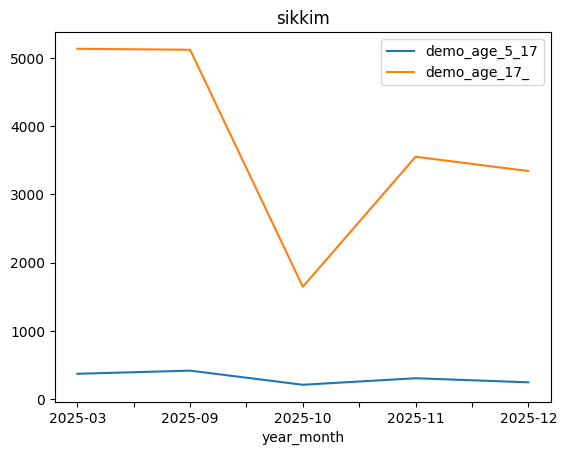

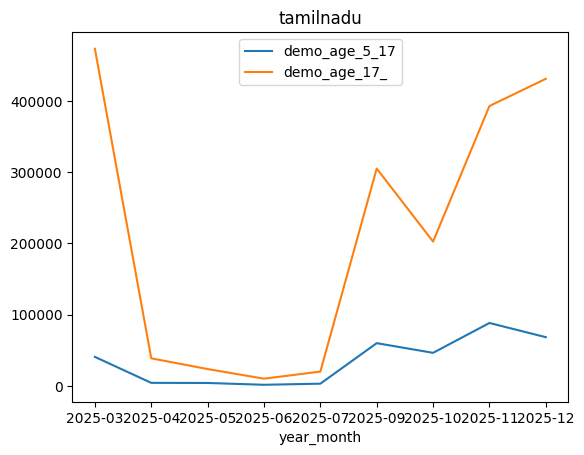

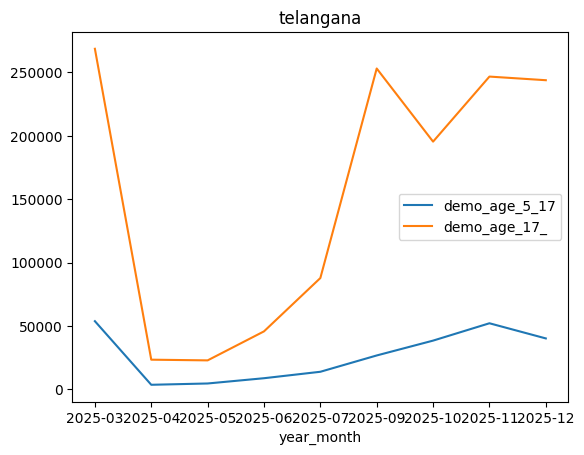

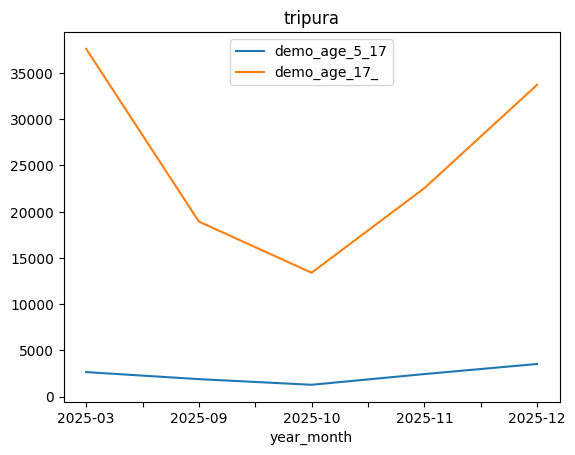

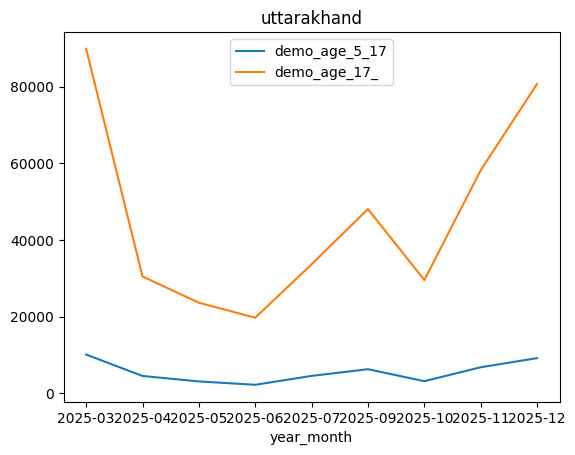

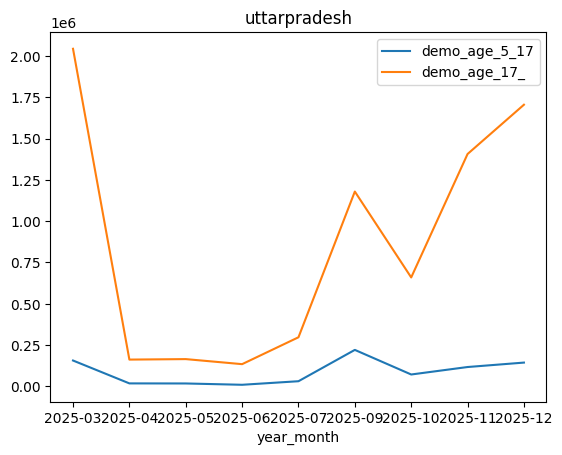

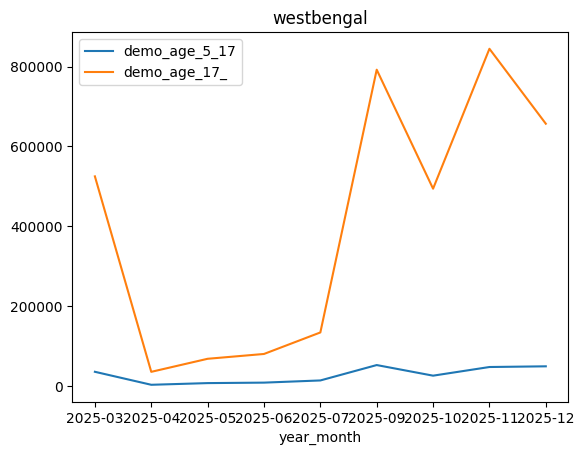

In [26]:
for state,d in demog.groupby('state'):
  d.plot(x='year_month',y=demoage,title=state)
  plt.show()

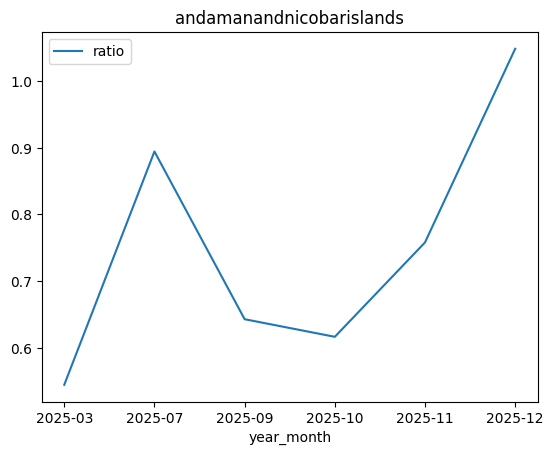

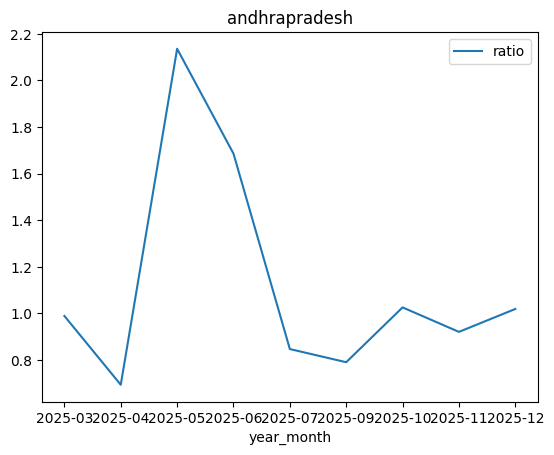

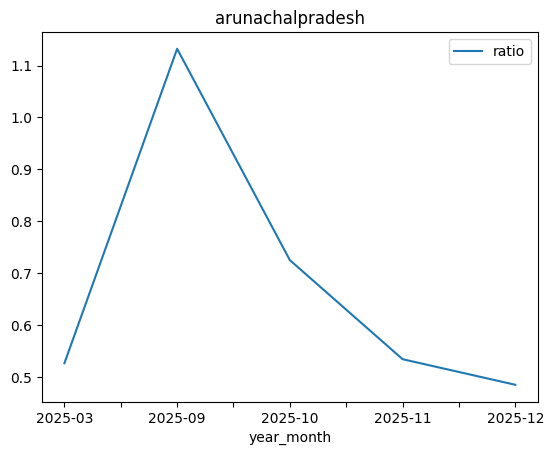

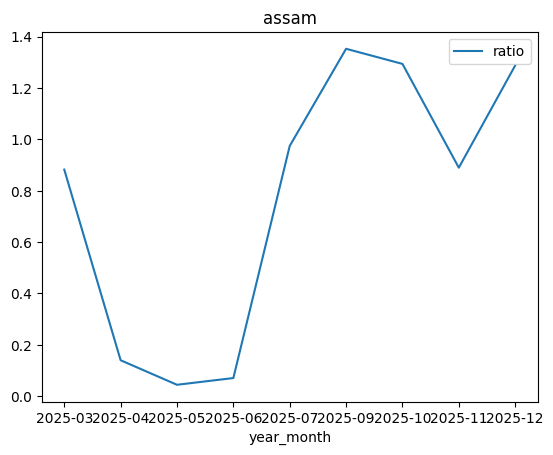

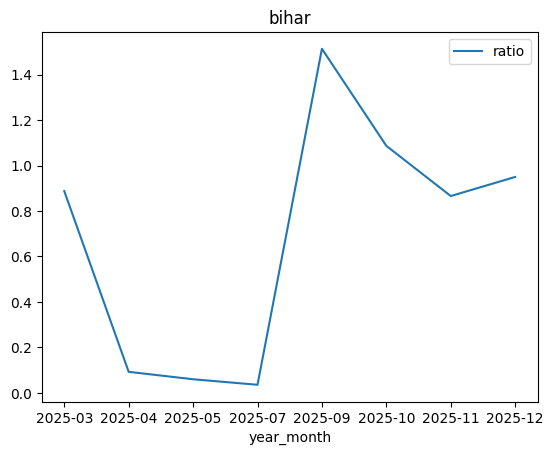

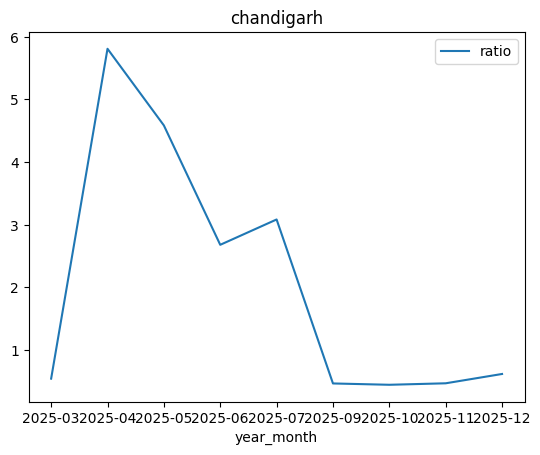

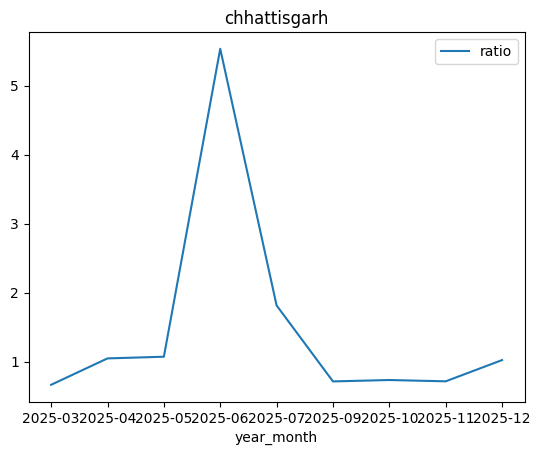

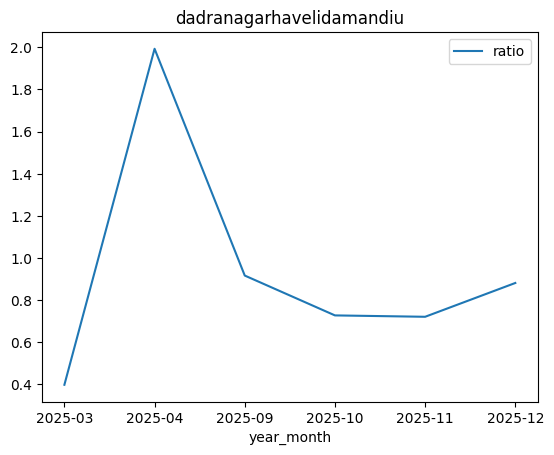

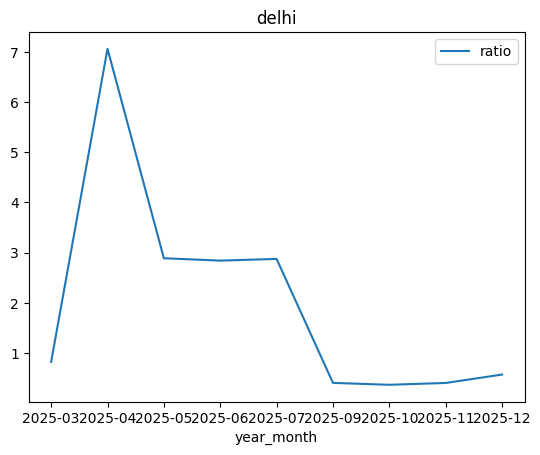

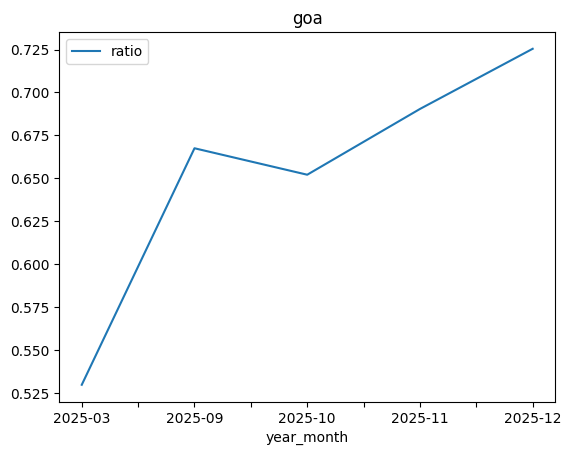

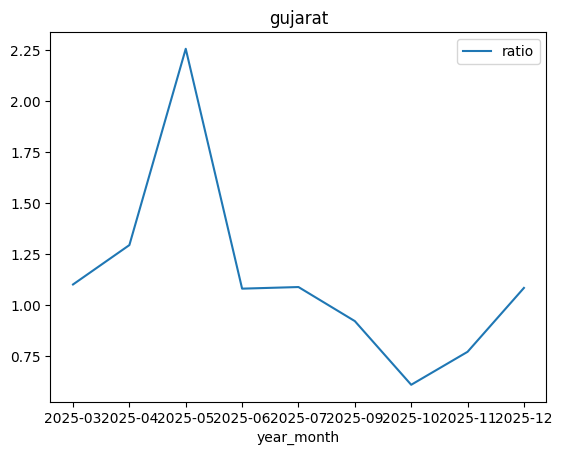

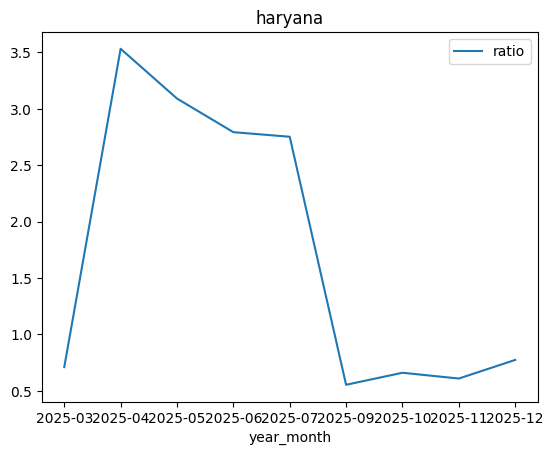

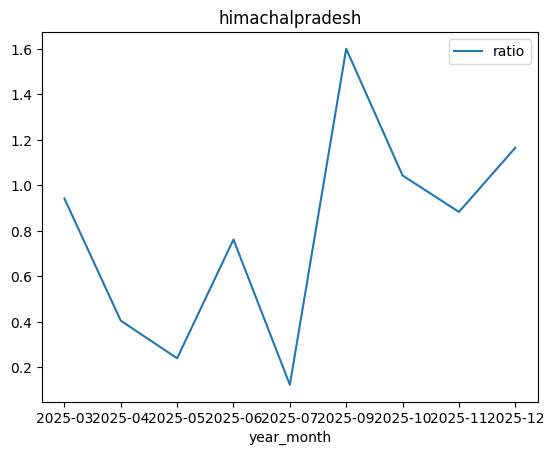

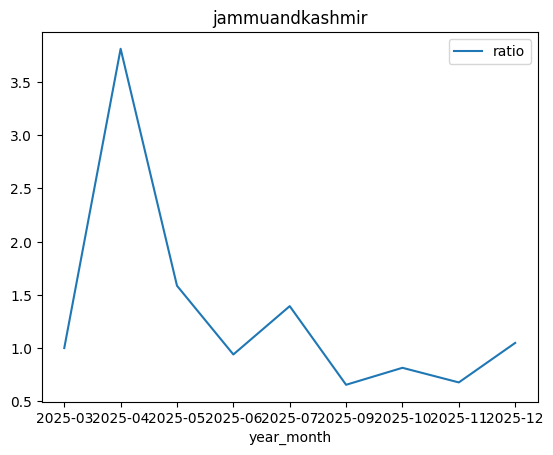

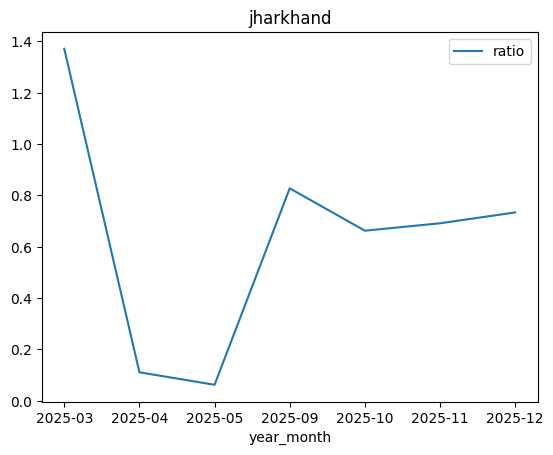

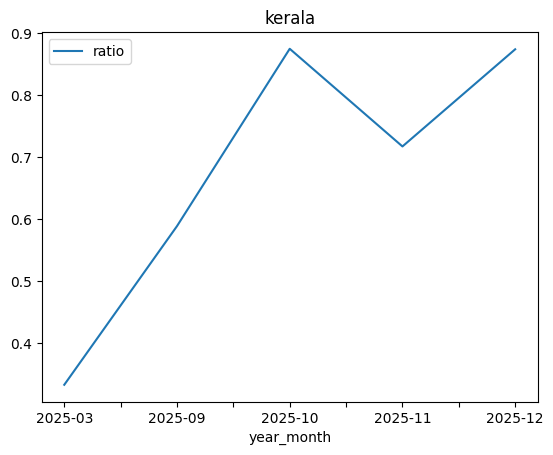

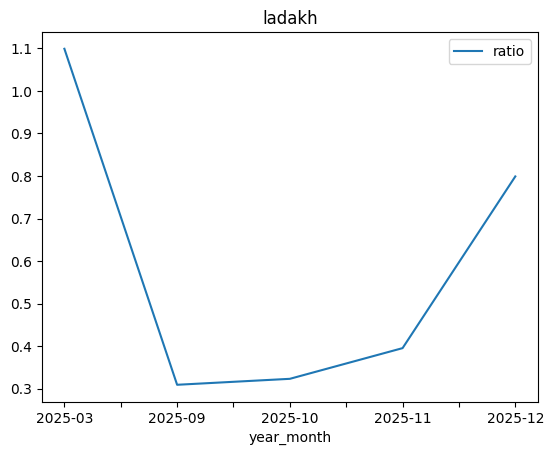

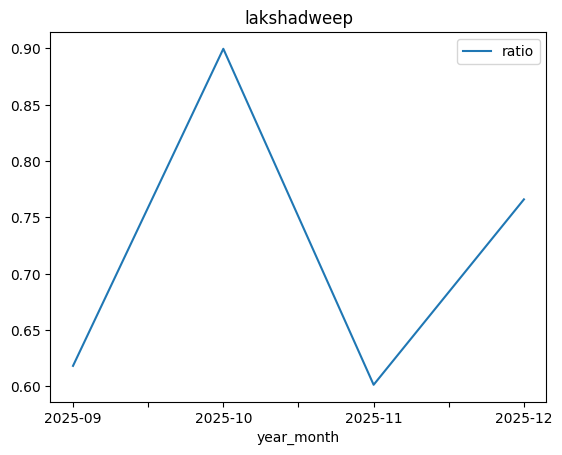

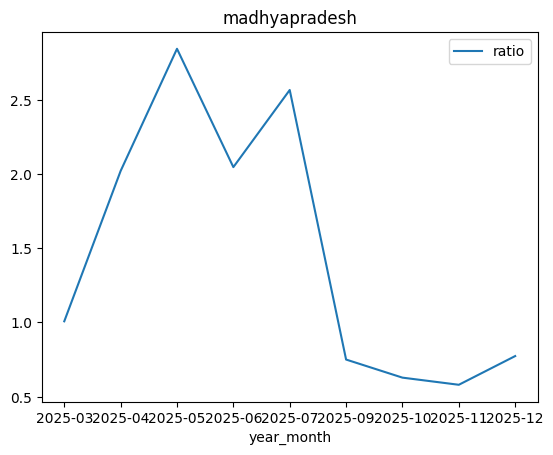

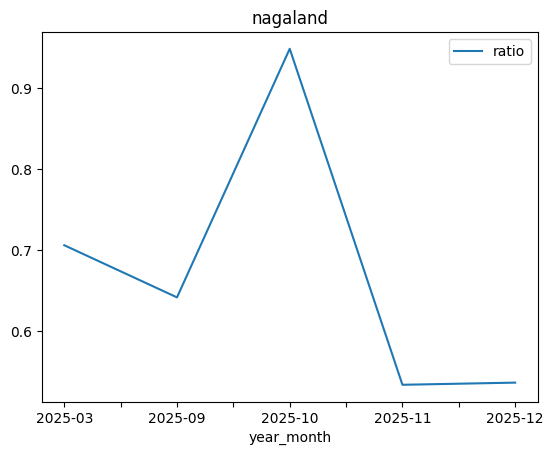

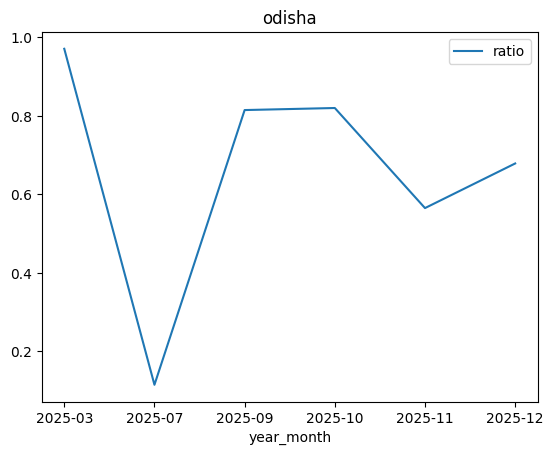

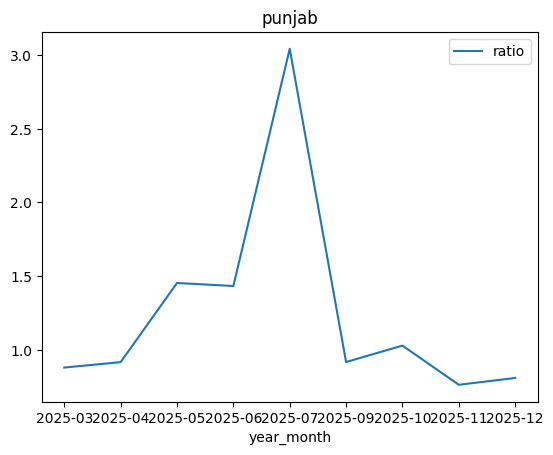

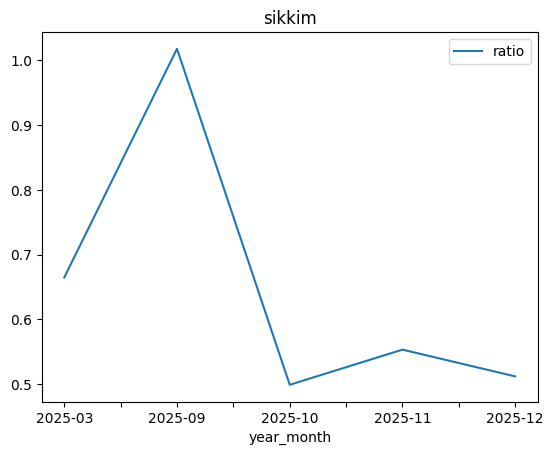

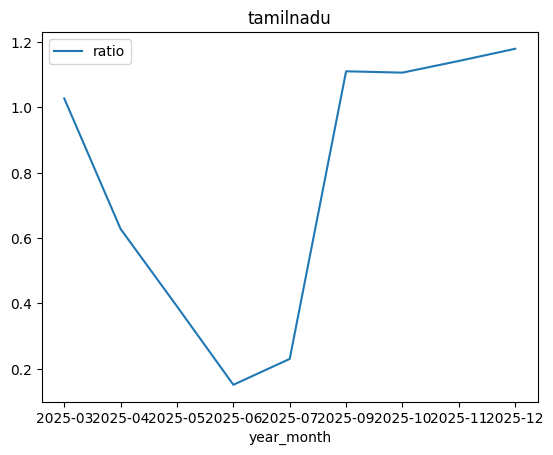

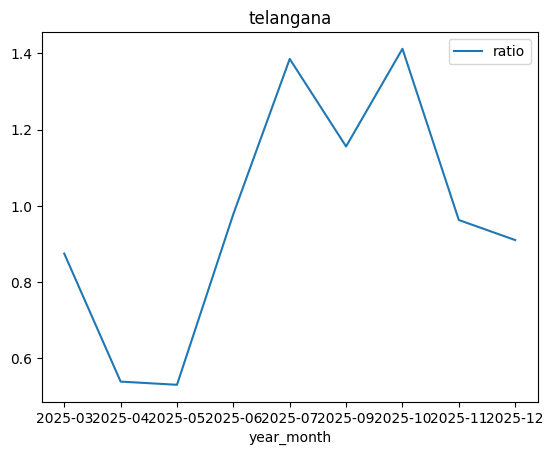

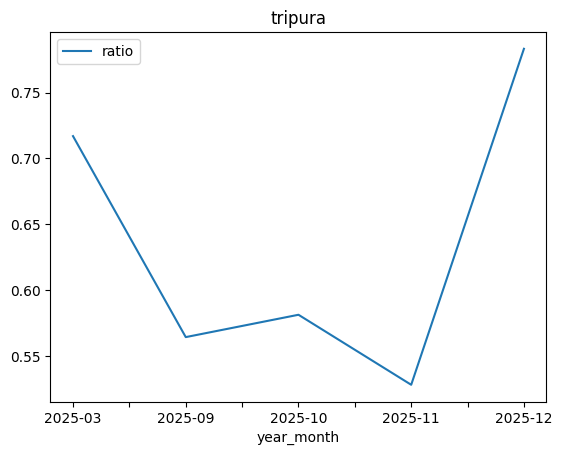

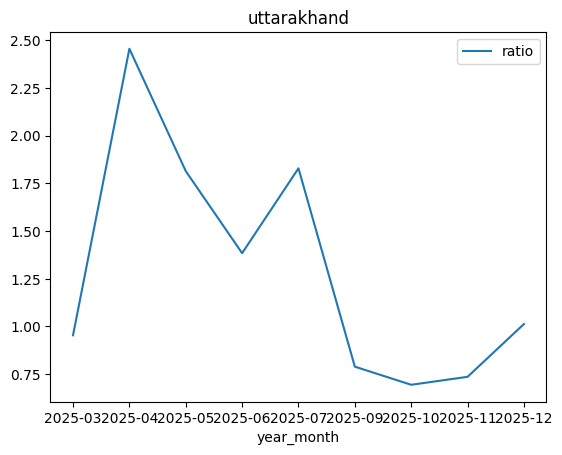

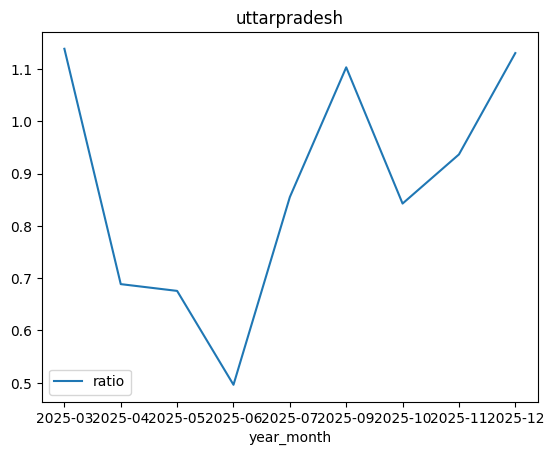

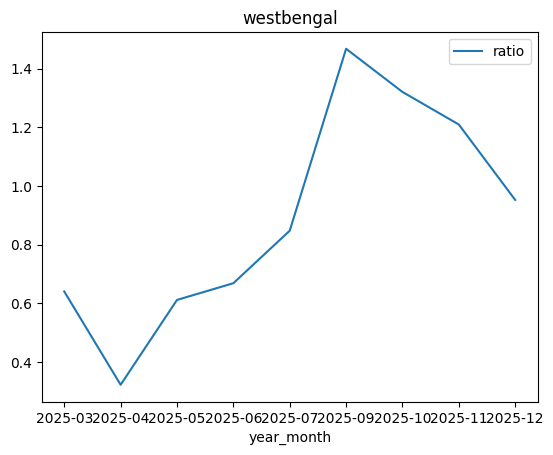

In [27]:
# state-month totals
s = demodf.groupby(['state','year_month'])[demoage].sum().sum(axis=1).reset_index(name='val')

# total-month totals
t = demodf.groupby('year_month')[demoage].sum().sum(axis=1).reset_index(name='total')

# normalize by mean
s['norm'] = s['val'] / s.groupby('state')['val'].transform('mean')
t['norm_total'] = t['total'] / t['total'].mean()

# merge + ratio
m = s.merge(t[['year_month','norm_total']], on='year_month')
m['ratio'] = m['norm'] / m['norm_total']

# plot
for state, d in m.groupby('state'):
    d.plot(x='year_month', y='ratio', title=state)
    plt.show()


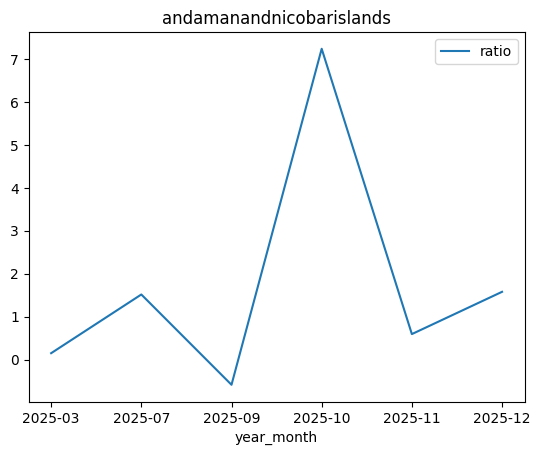

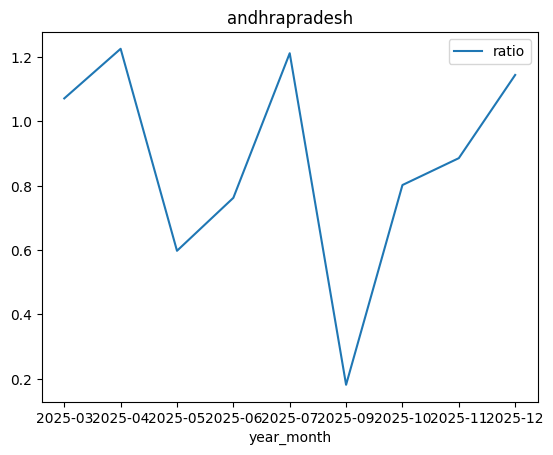

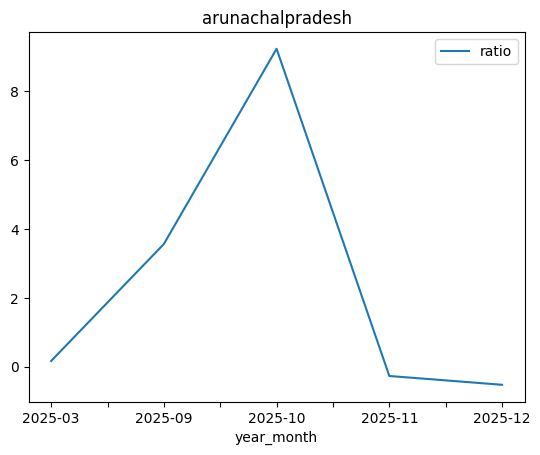

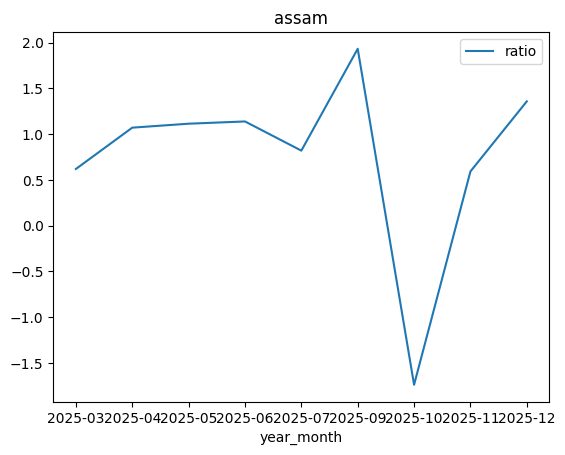

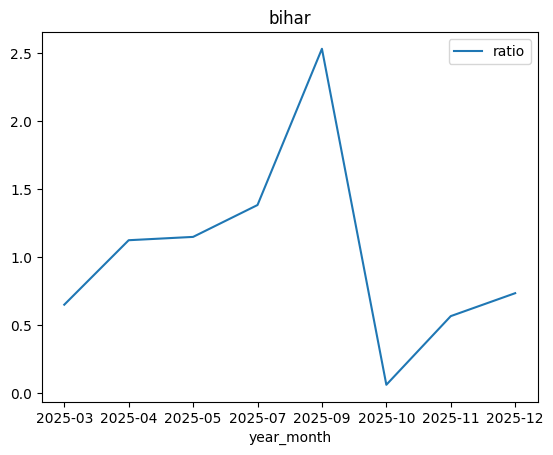

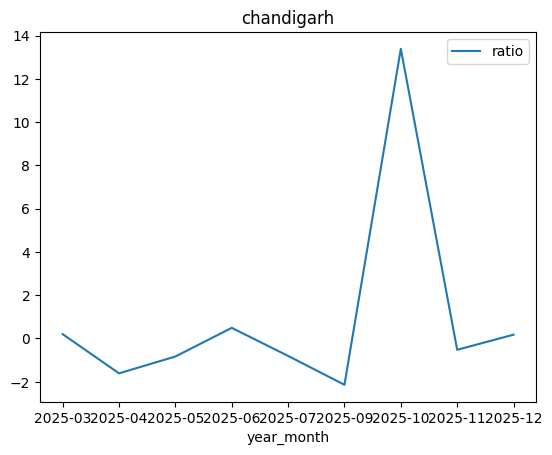

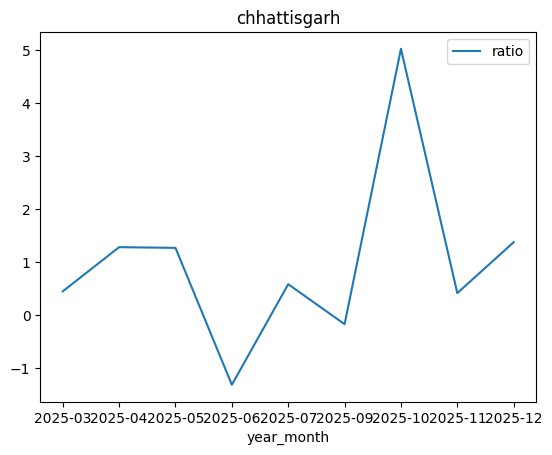

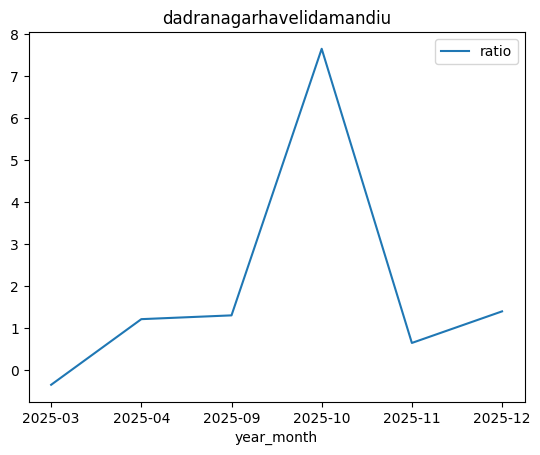

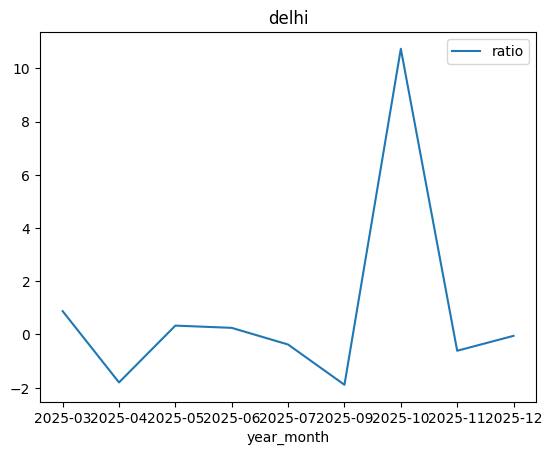

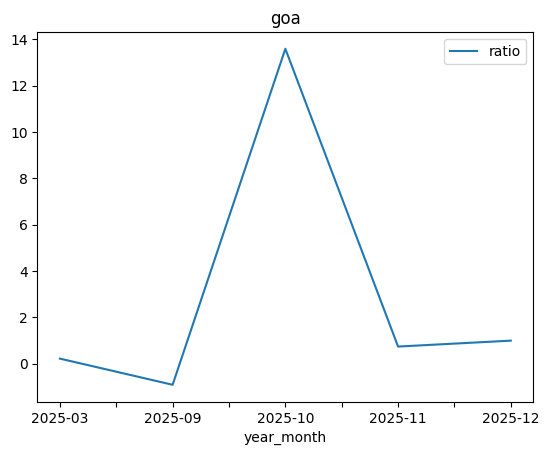

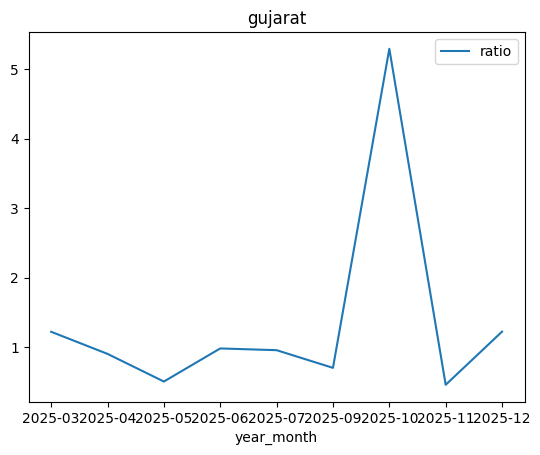

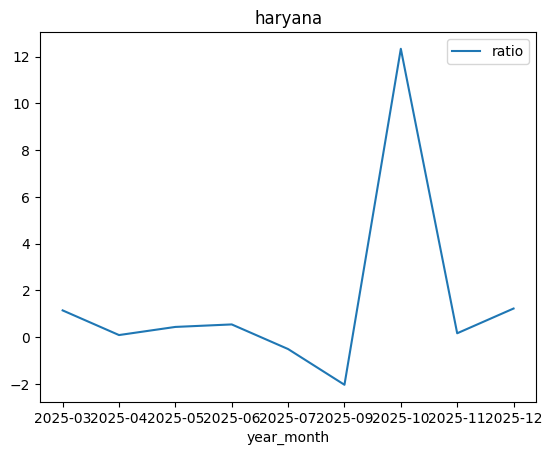

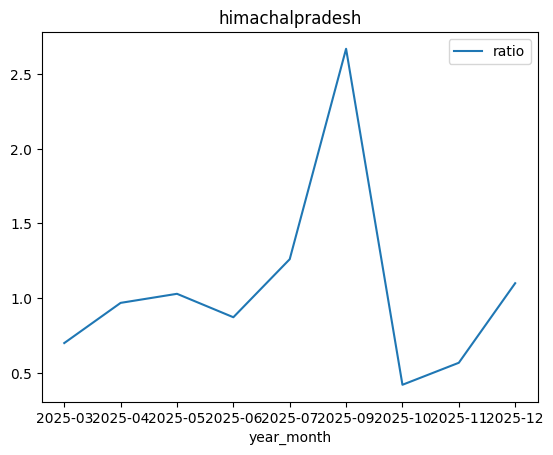

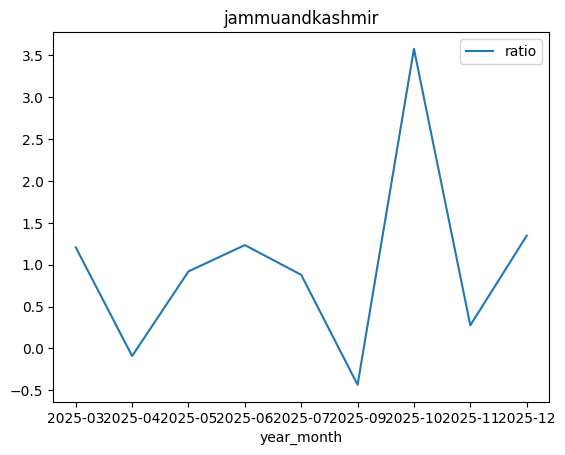

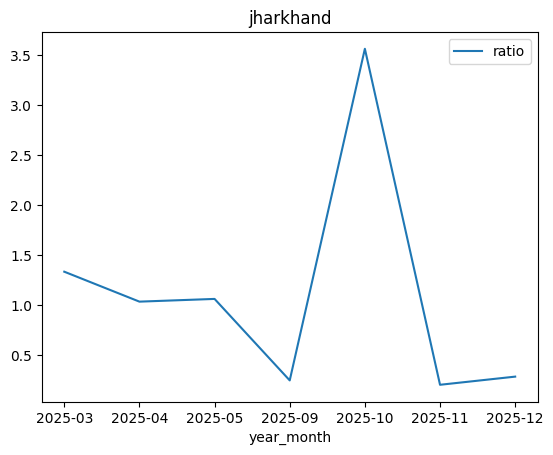

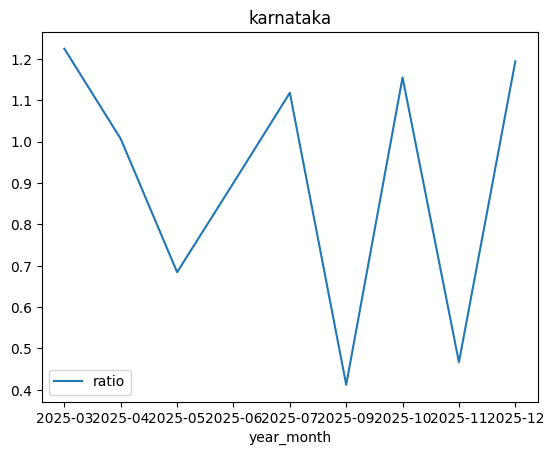

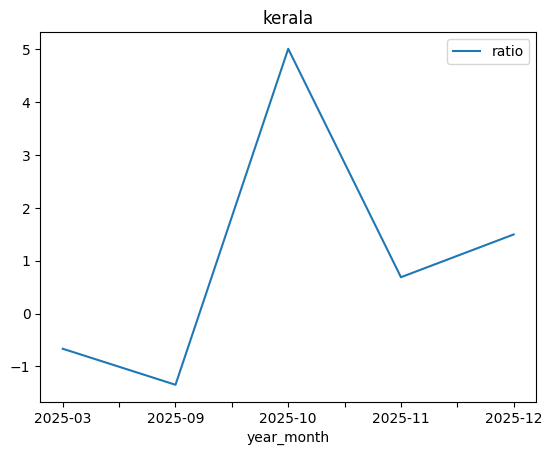

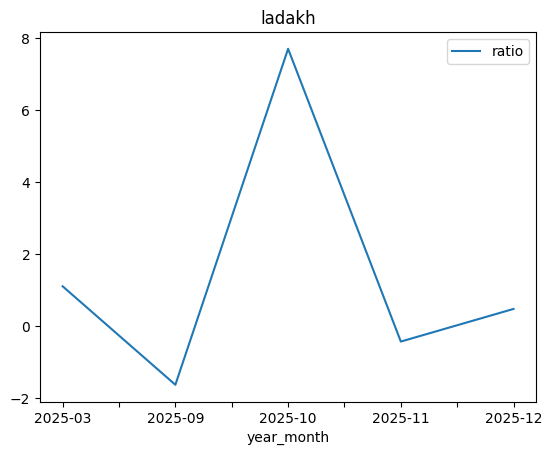

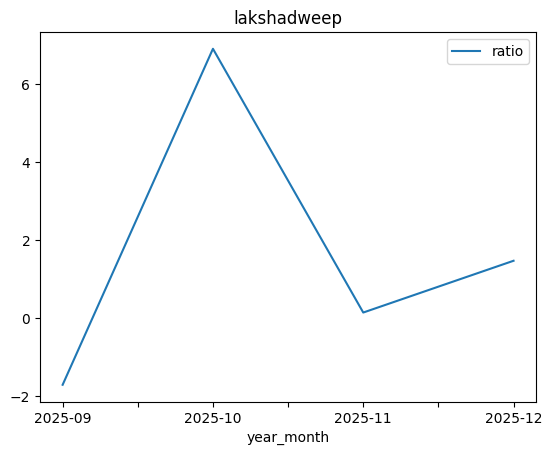

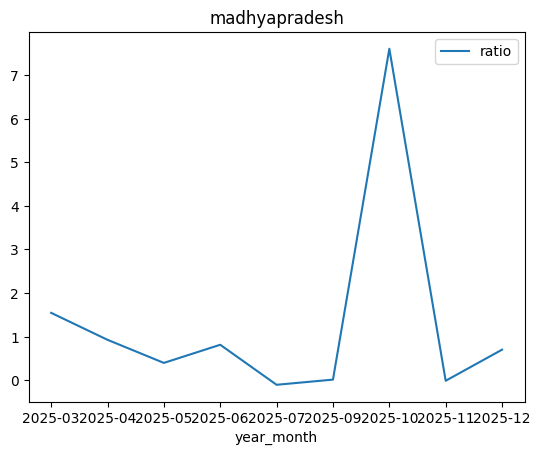

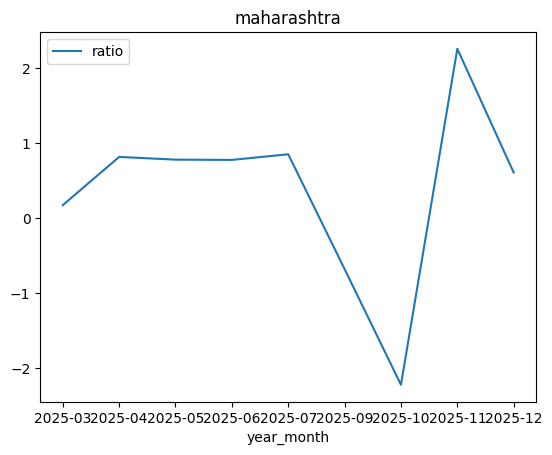

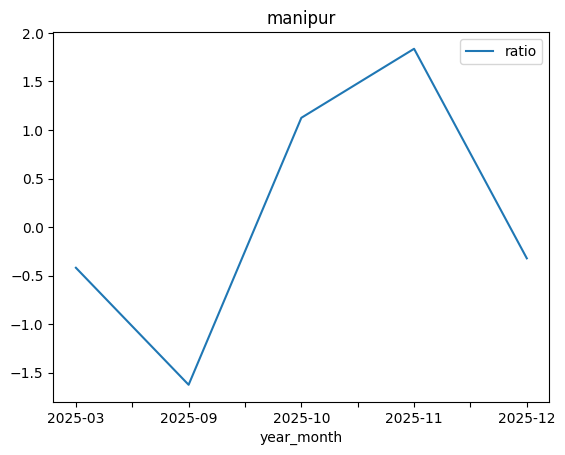

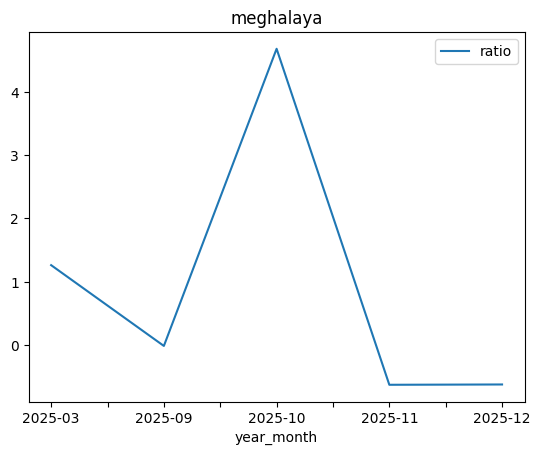

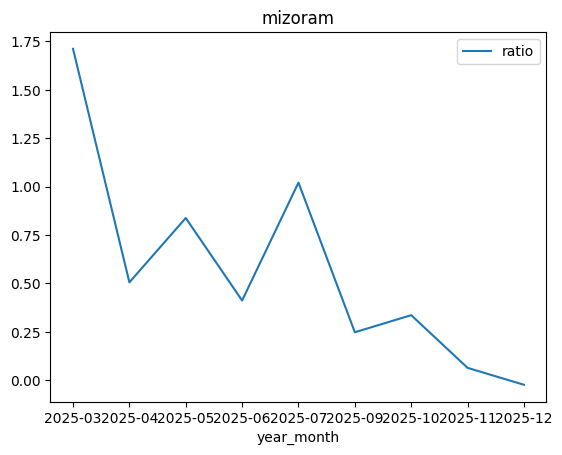

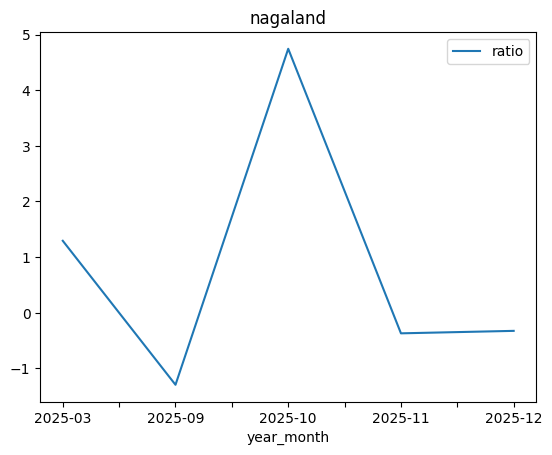

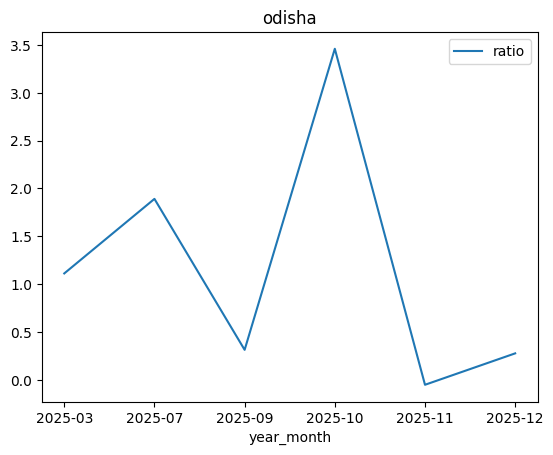

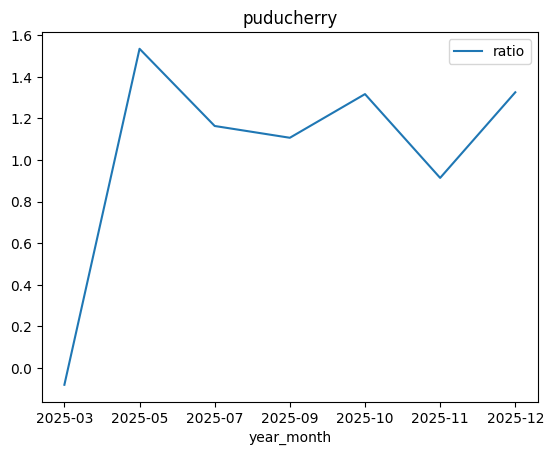

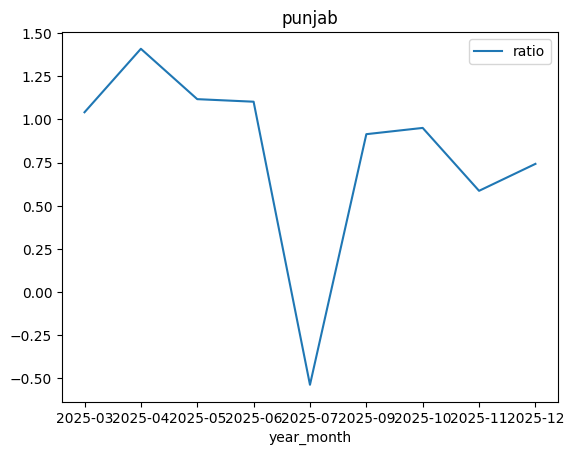

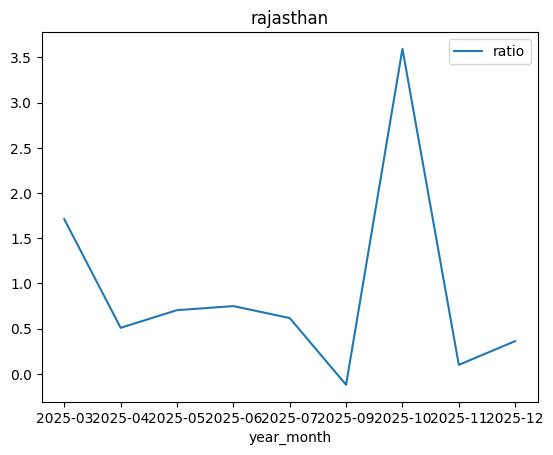

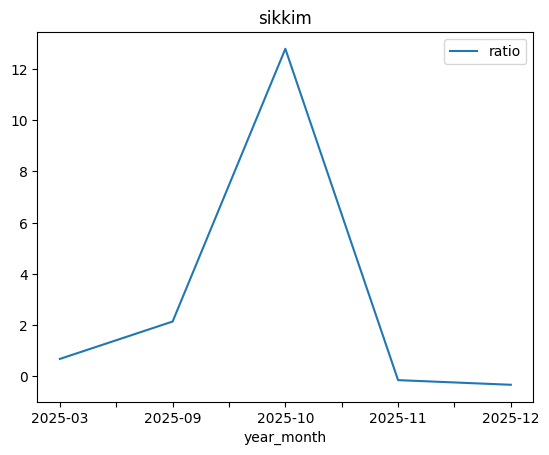

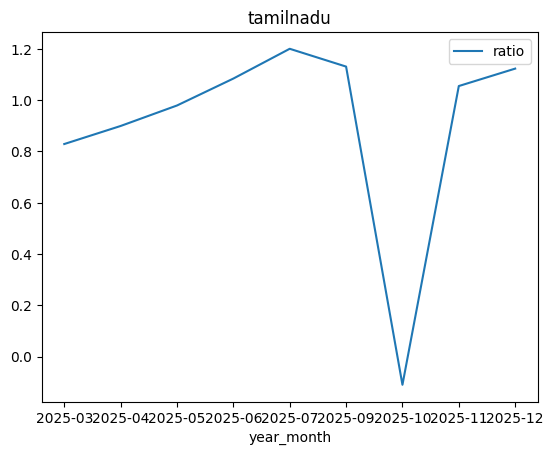

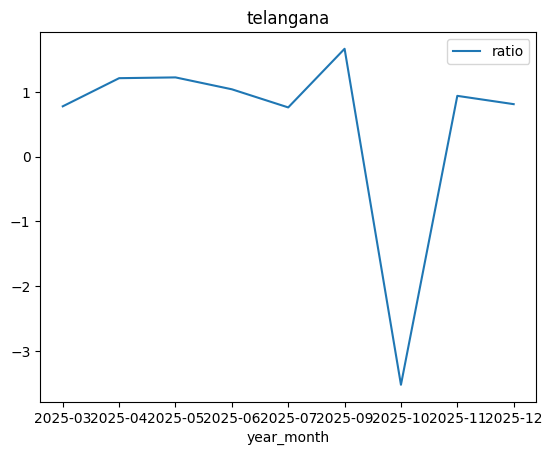

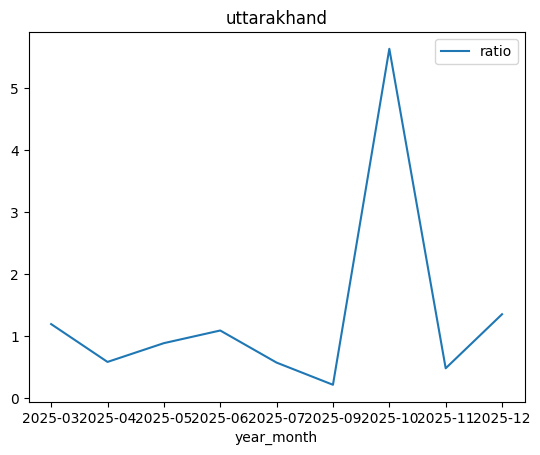

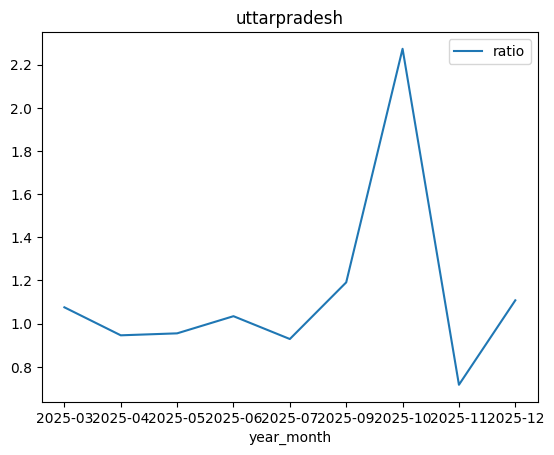

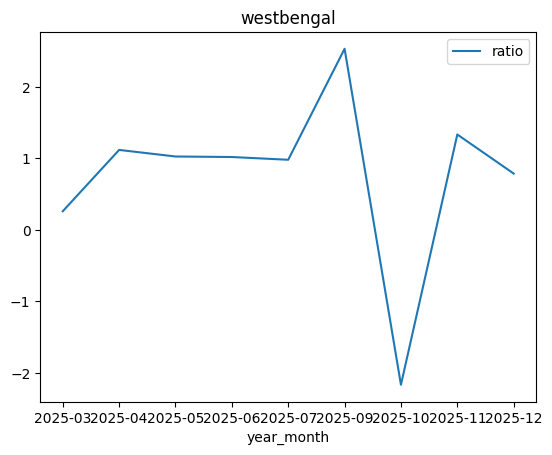

In [28]:
from sklearn.preprocessing import StandardScaler

# state-month totals
s = demodf.groupby(['state','year_month'])[demoage].sum().sum(axis=1).reset_index(name='val')

# total-month totals
t = demodf.groupby('year_month')[demoage].sum().sum(axis=1).reset_index(name='total')

sc = StandardScaler()

# scale per state
s['z_state'] = s.groupby('state')['val'].transform(lambda x: sc.fit_transform(x.values.reshape(-1,1)).ravel())

# scale total
t['z_total'] = sc.fit_transform(t[['total']]).ravel()

# merge + ratio
m = s.merge(t[['year_month','z_total']], on='year_month')
m['ratio'] = m['z_state'] / m['z_total']

# plot
for state, d in m.groupby('state'):
    d.plot(x='year_month', y='ratio', title=state)
    plt.show()


In [29]:
demodf[demodf['year_month']=='2025-10'][demoage].sum().sum()

np.int64(5010966)

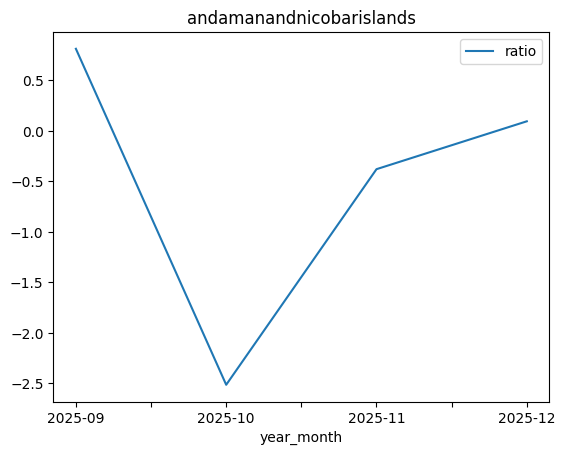

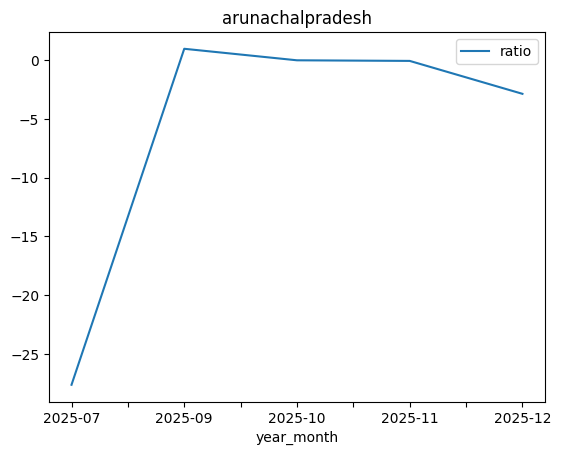

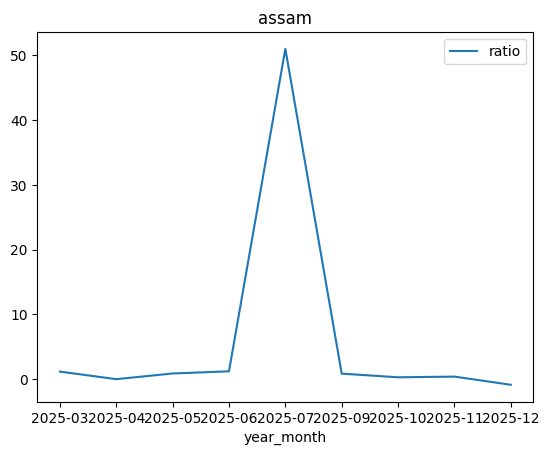

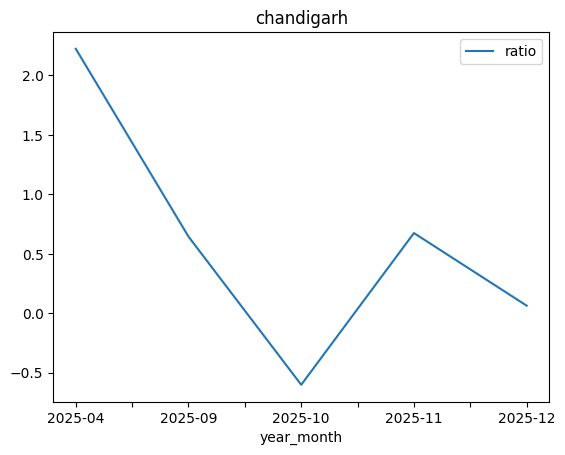

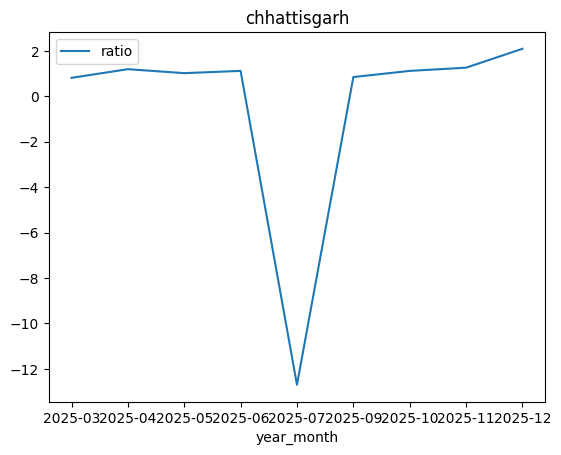

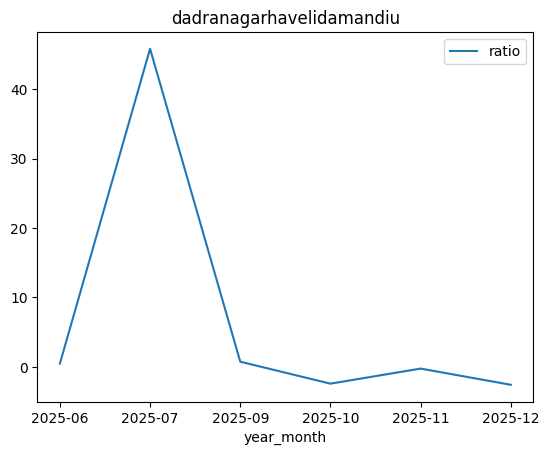

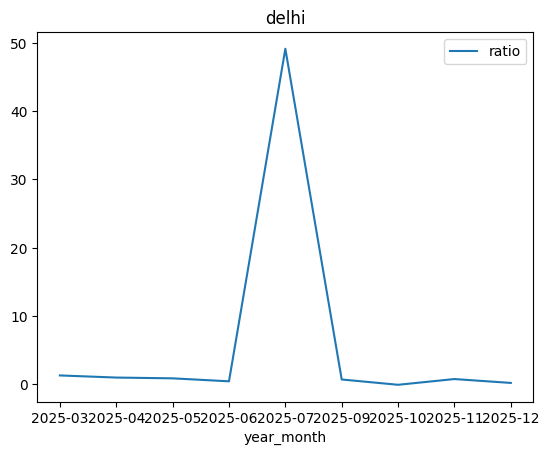

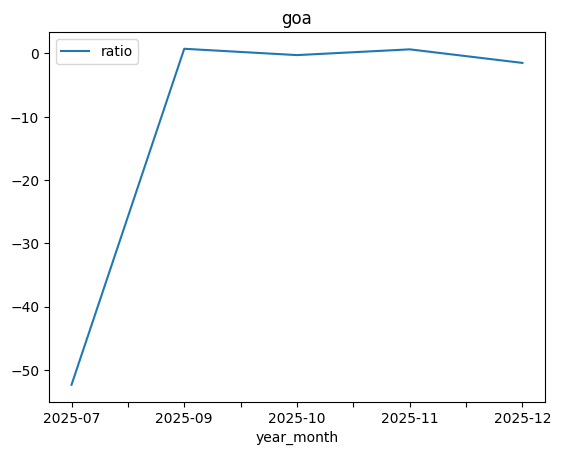

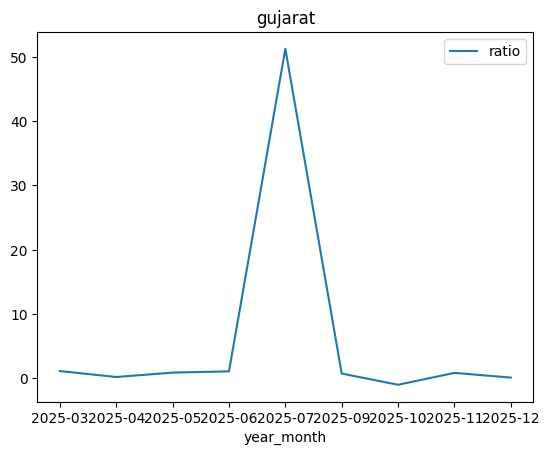

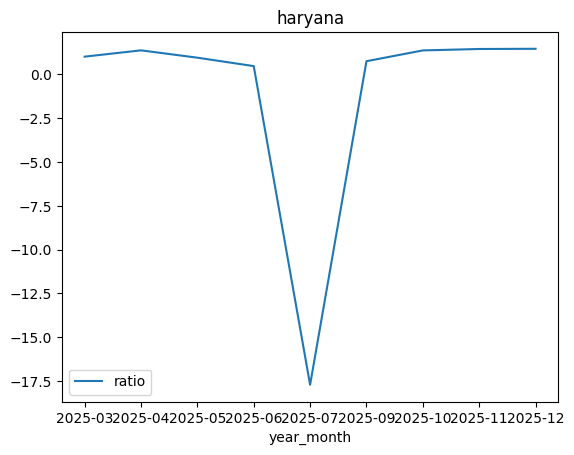

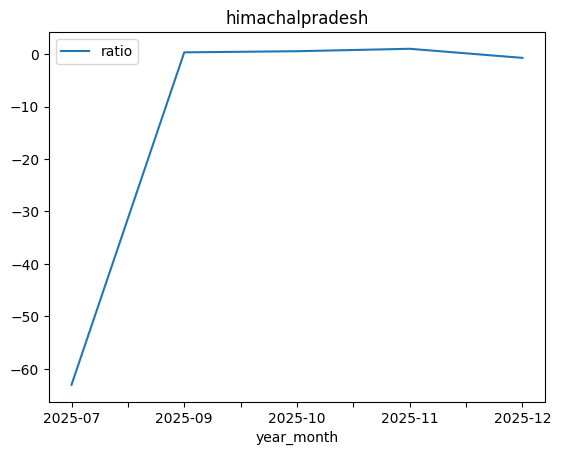

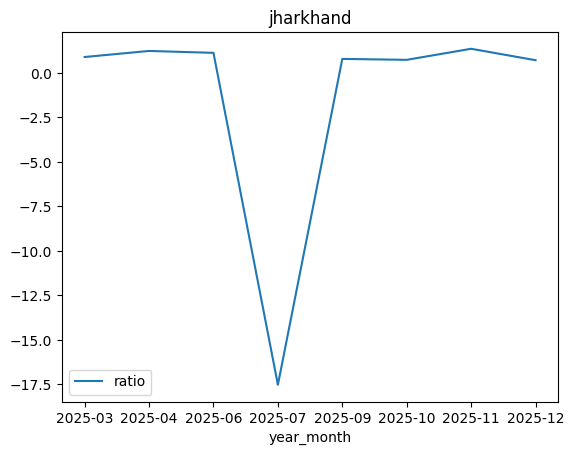

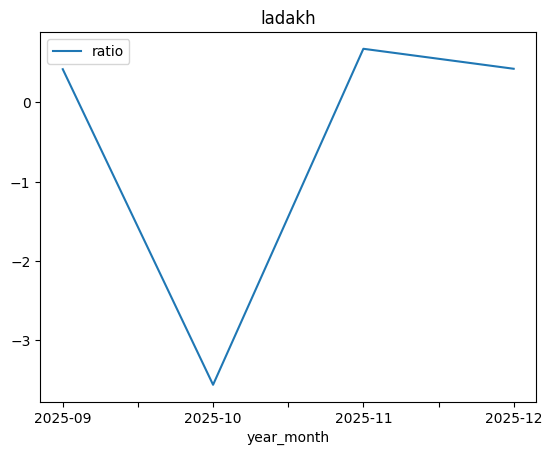

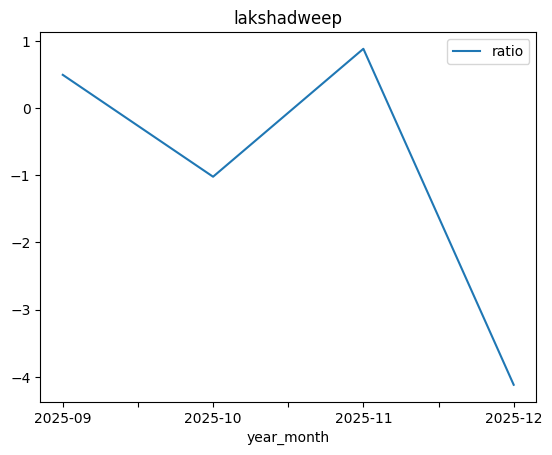

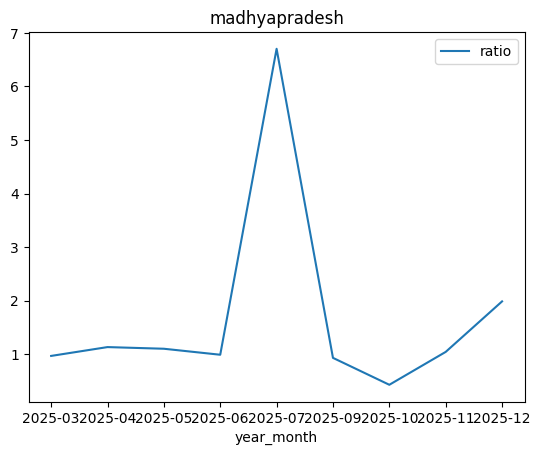

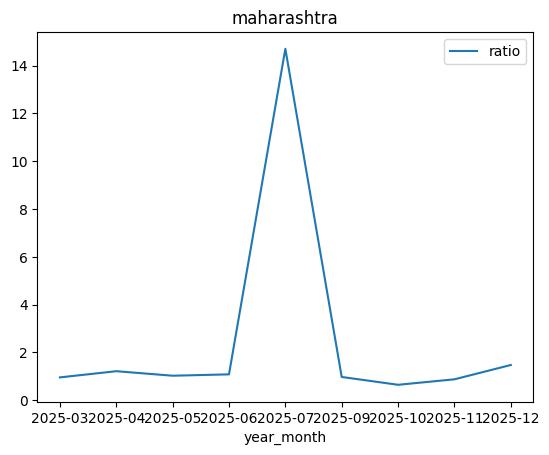

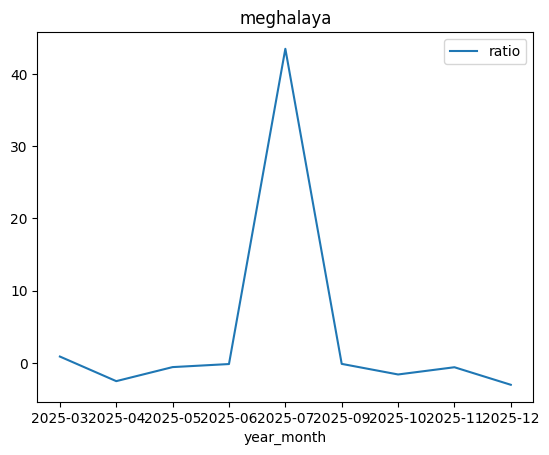

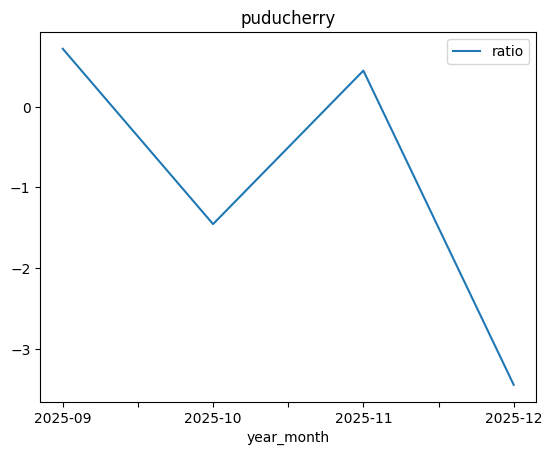

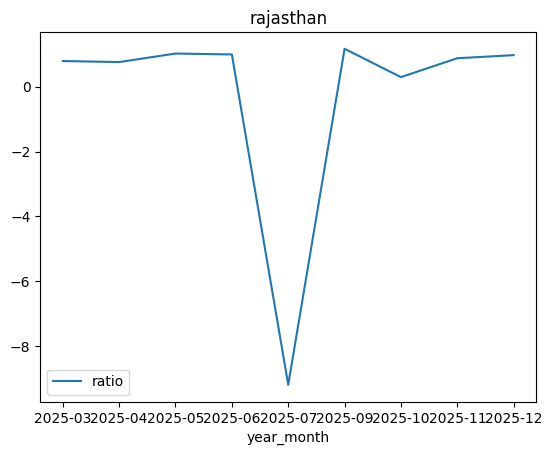

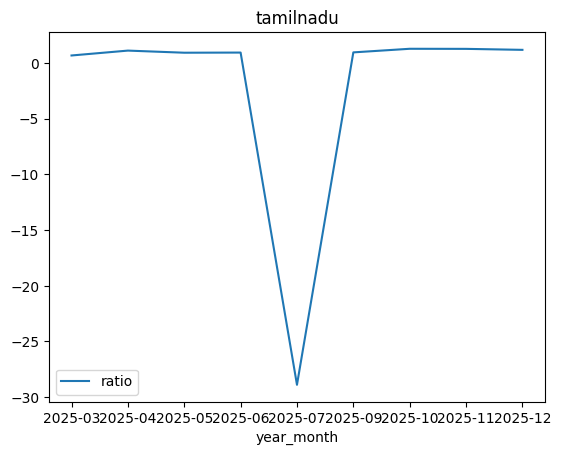

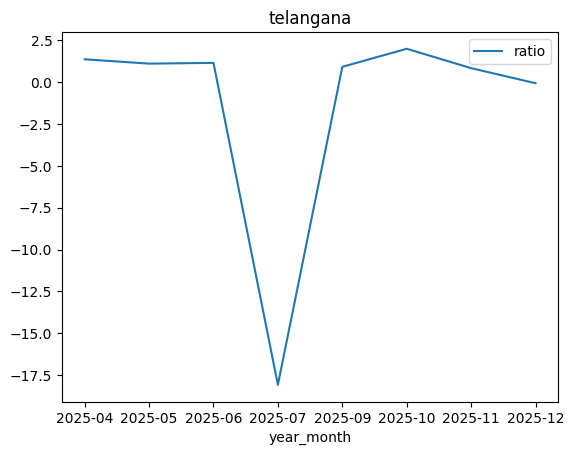

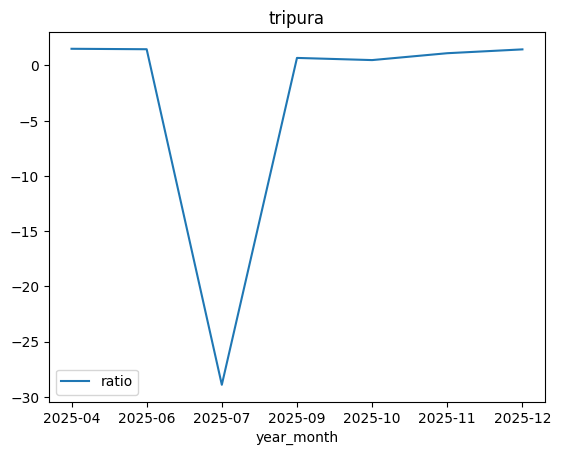

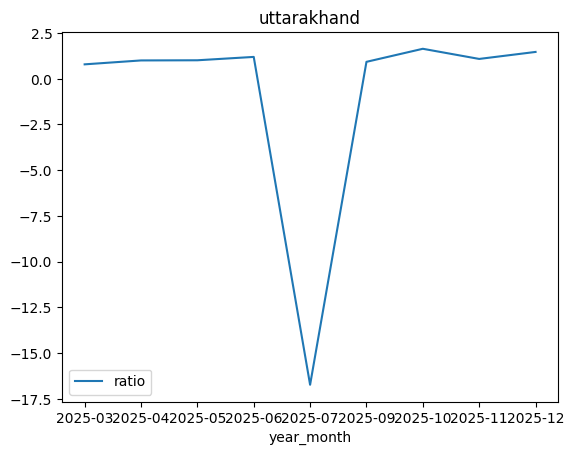

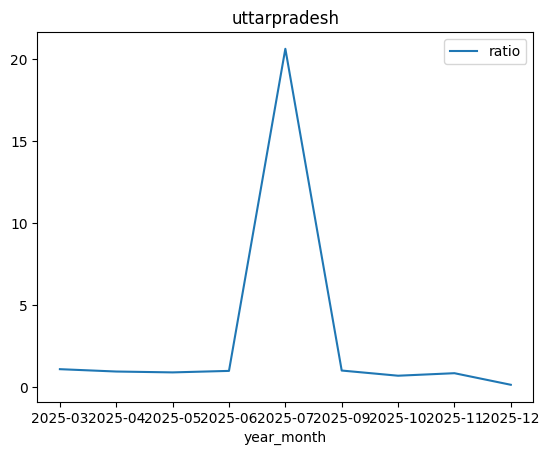

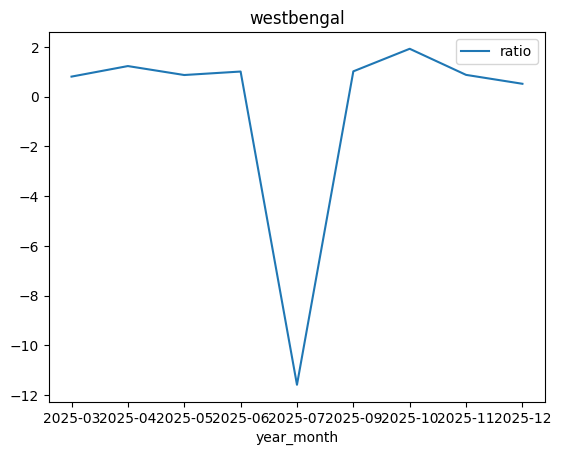

In [30]:
s = enroldf.groupby(['state','year_month'])[enrolage].sum().sum(axis=1).reset_index(name='val')
t = enroldf.groupby('year_month')[enrolage].sum().sum(axis=1).reset_index(name='total')

sc = StandardScaler()
s['z_state'] = s.groupby('state')['val'].transform(lambda x: sc.fit_transform(x.values.reshape(-1,1)).ravel())
t['z_total'] = sc.fit_transform(t[['total']]).ravel()
m = s.merge(t[['year_month','z_total']], on='year_month')
m['ratio'] = m['z_state'] / m['z_total']

for state, d in m.groupby('state'):
    d.plot(x='year_month', y='ratio', title=state)
    plt.show()


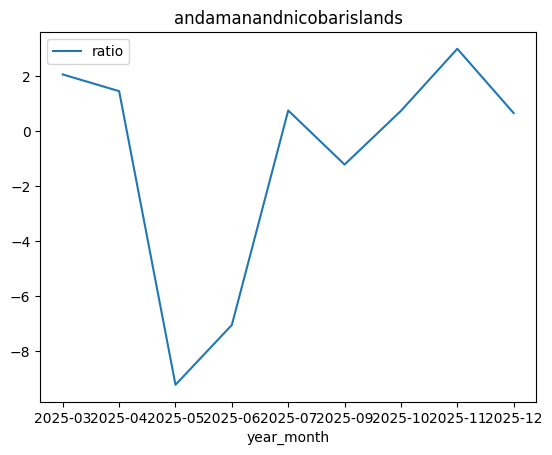

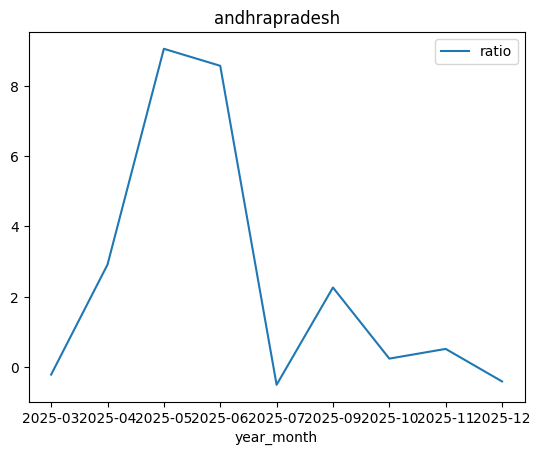

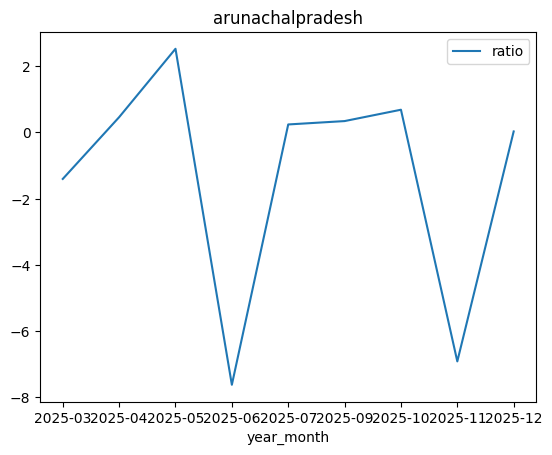

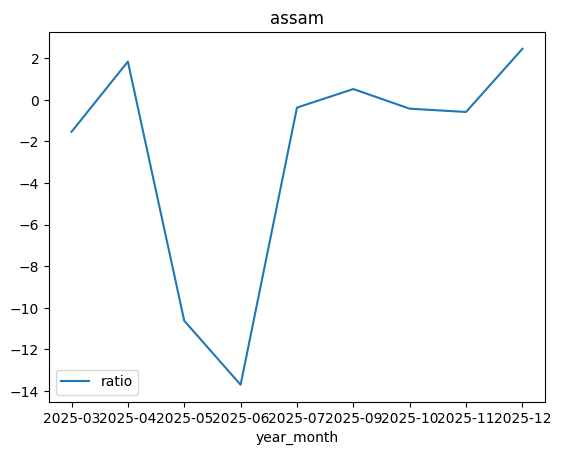

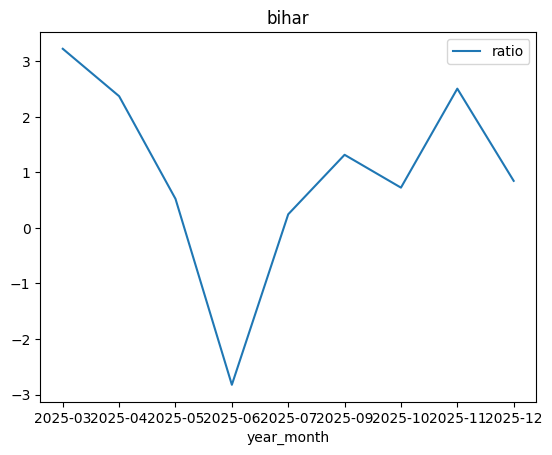

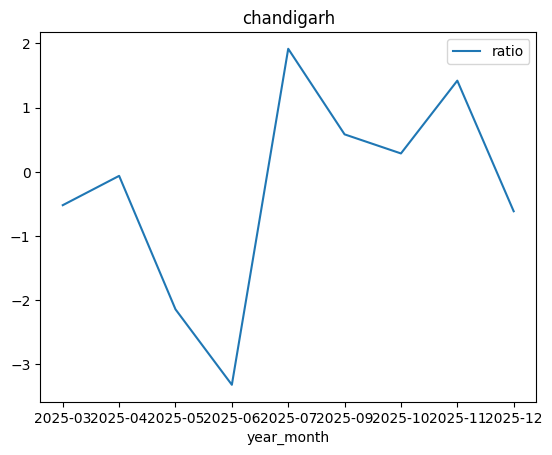

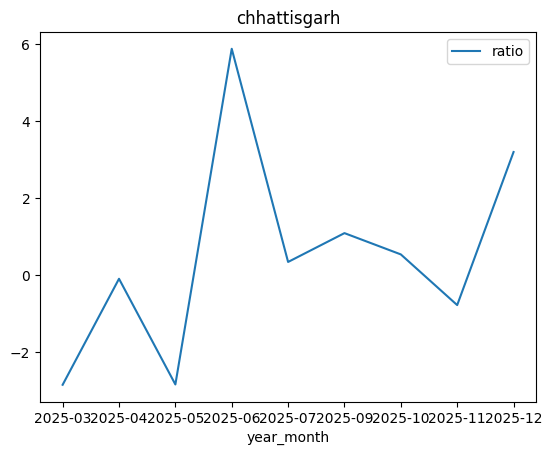

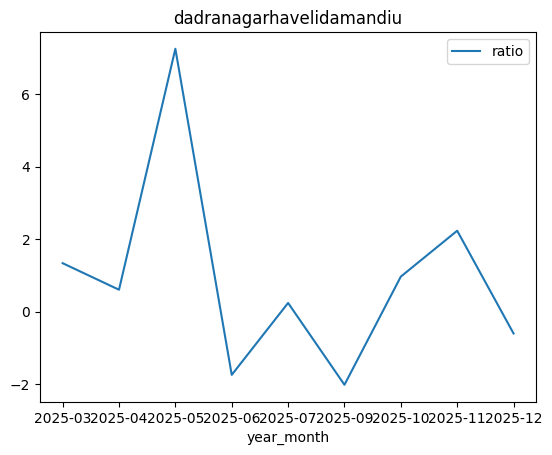

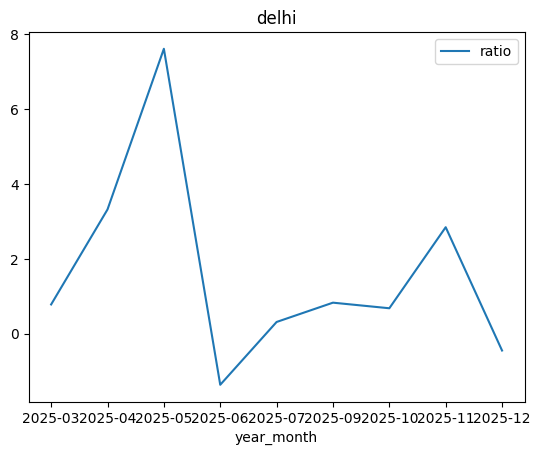

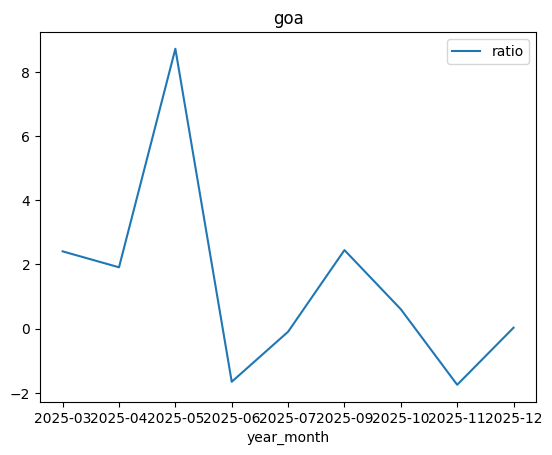

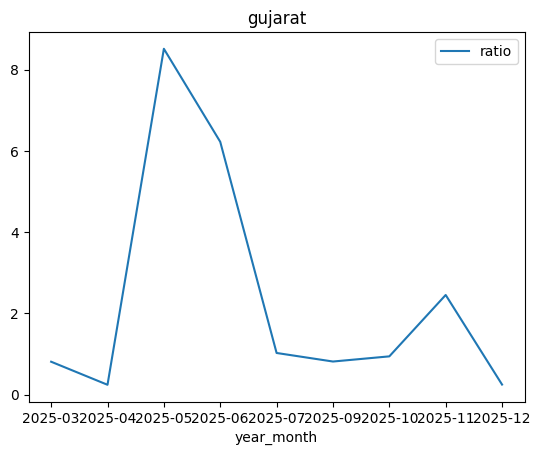

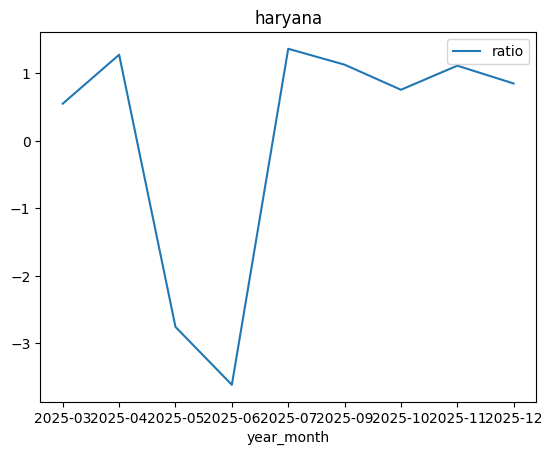

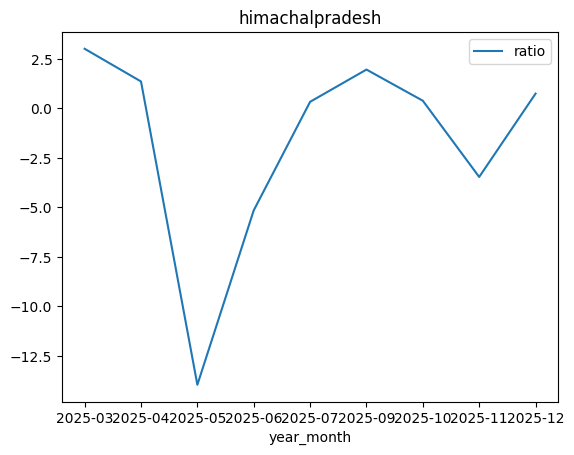

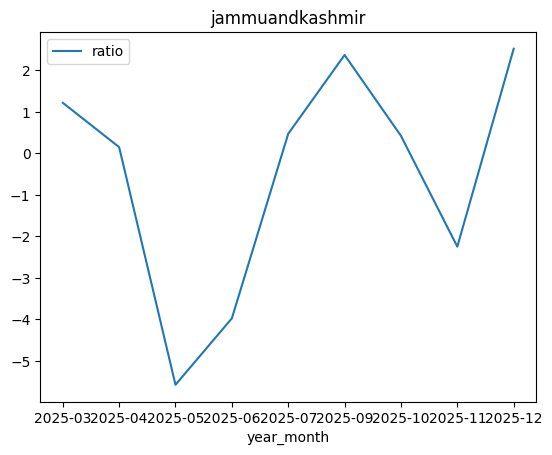

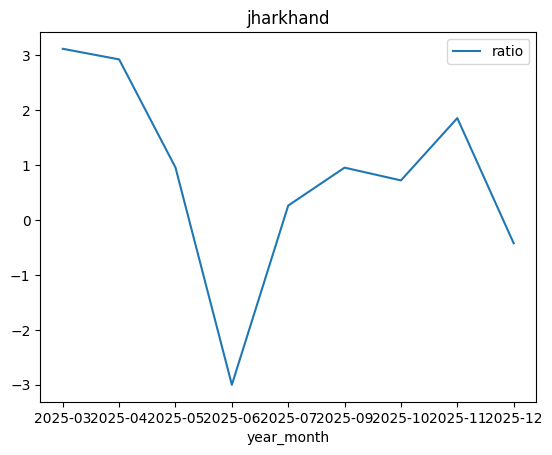

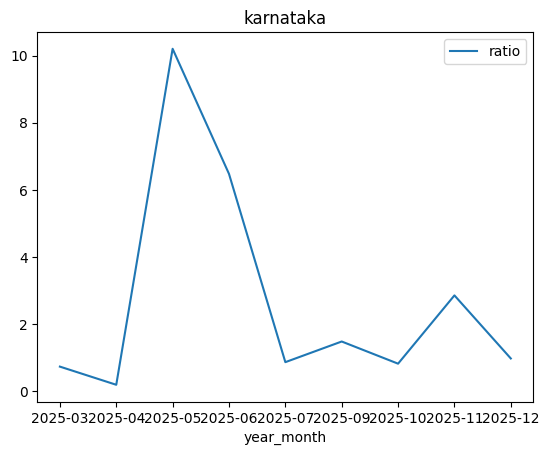

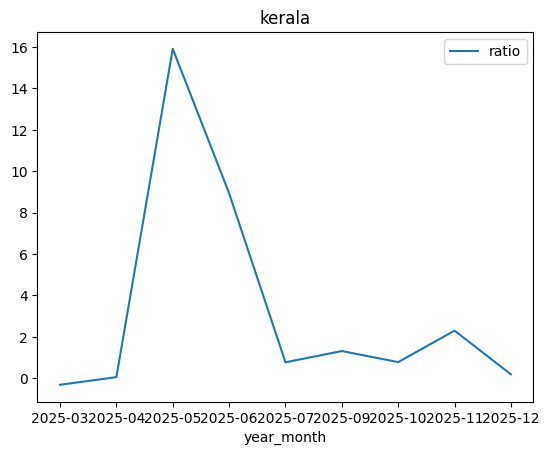

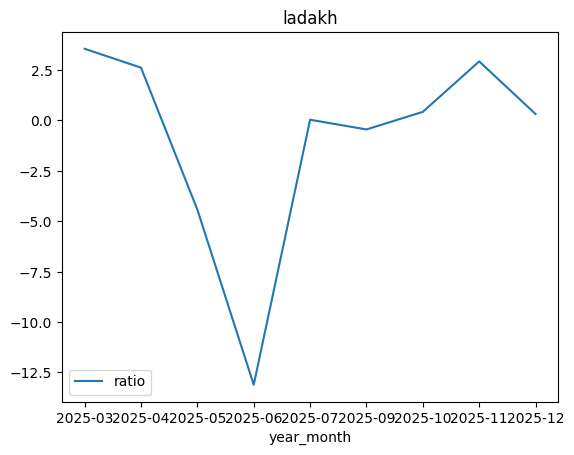

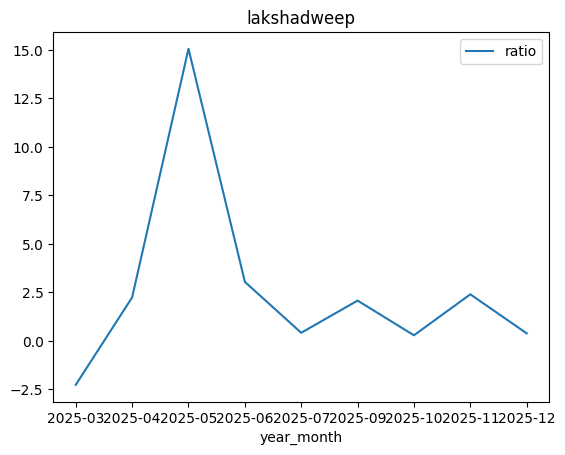

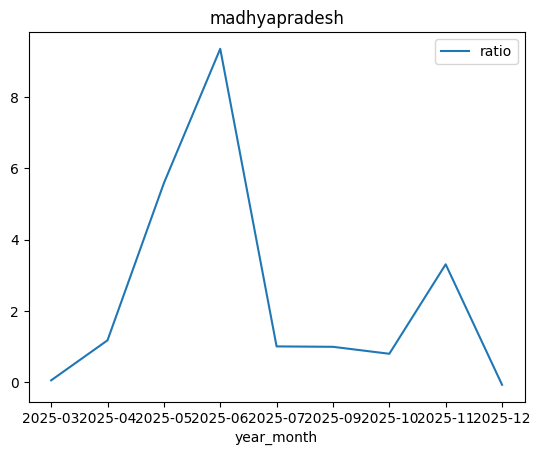

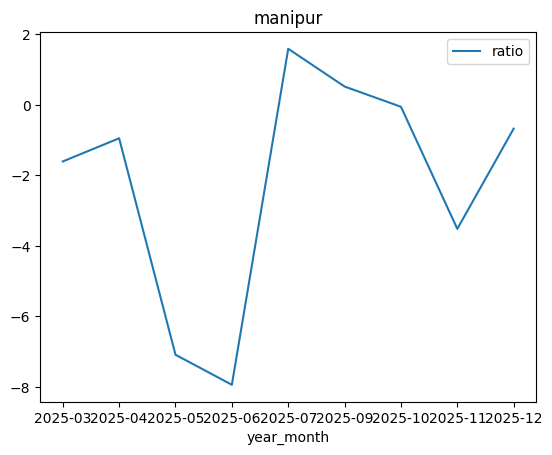

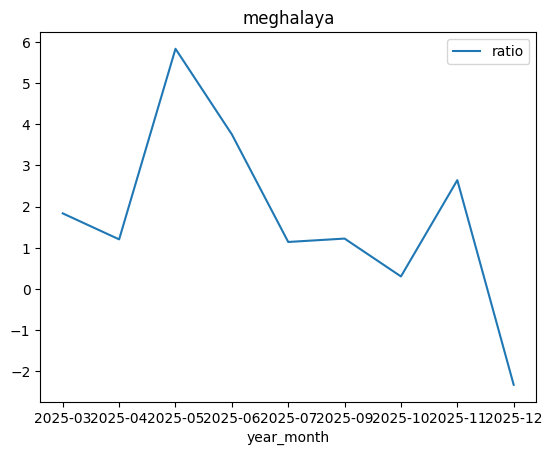

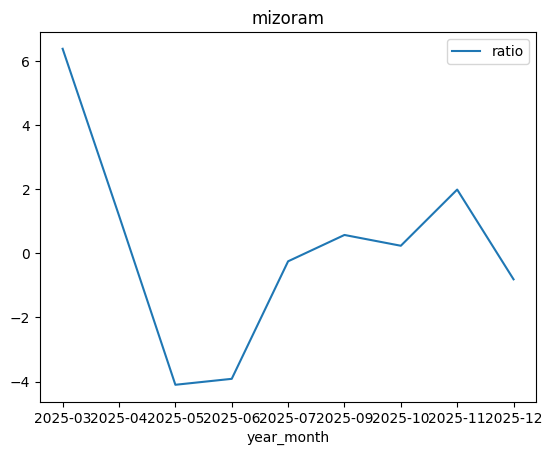

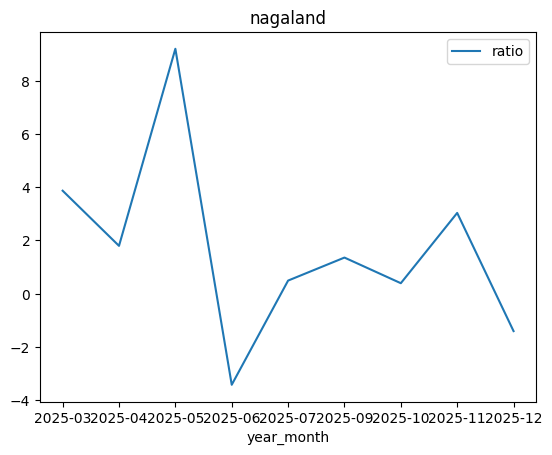

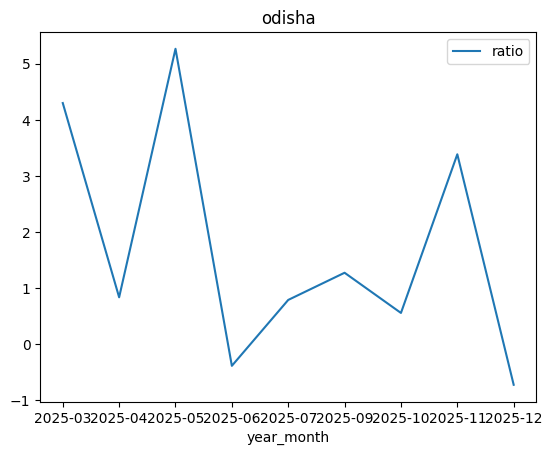

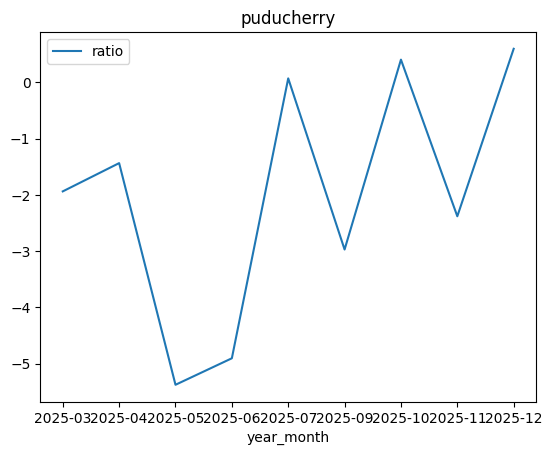

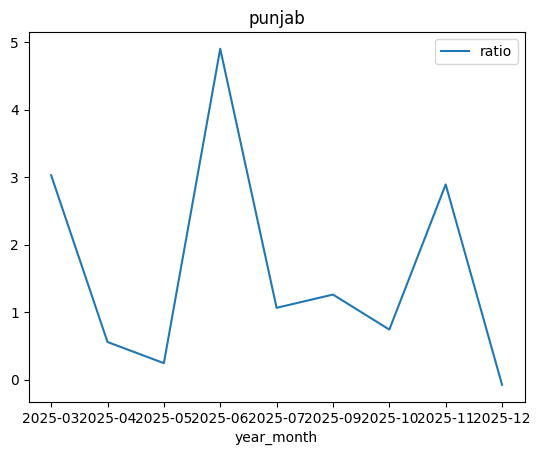

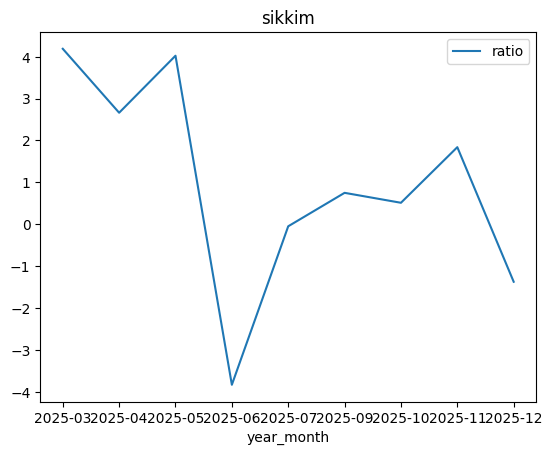

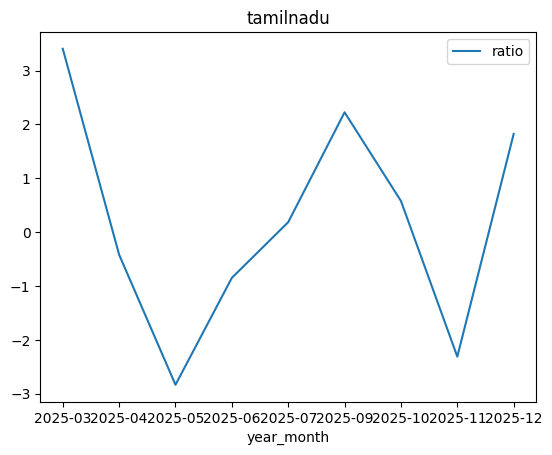

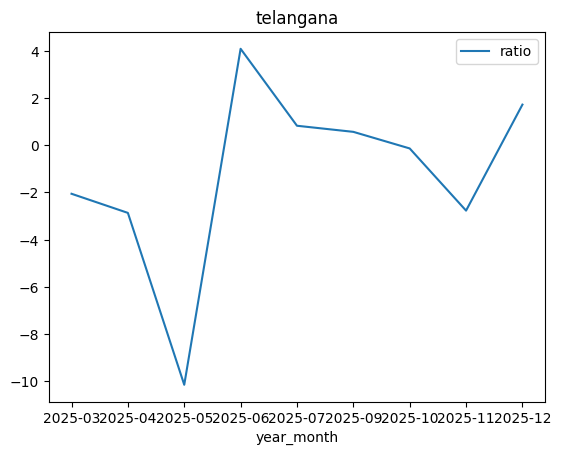

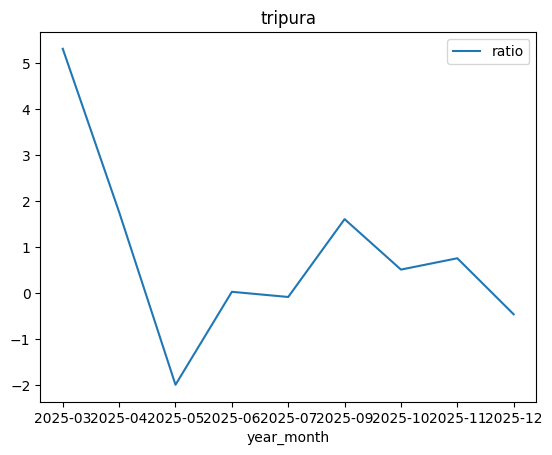

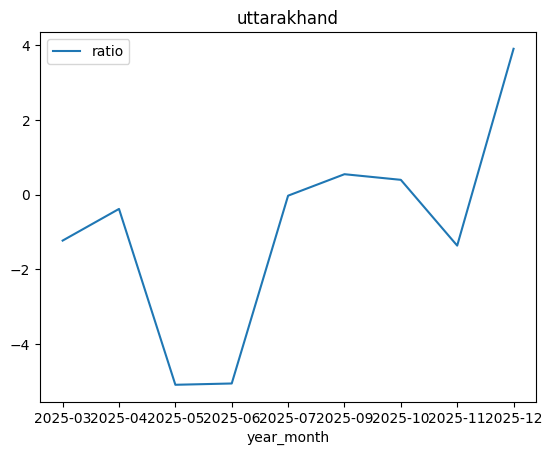

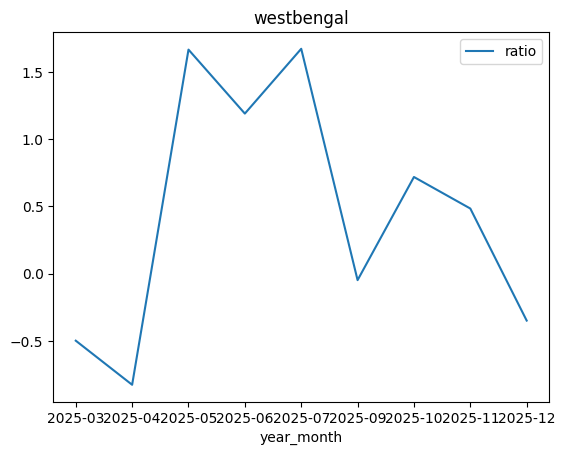

In [31]:
s = biodf.groupby(['state','year_month'])[bioage].sum().sum(axis=1).reset_index(name='val')
t = biodf.groupby('year_month')[bioage].sum().sum(axis=1).reset_index(name='total')

sc = StandardScaler()
s['z_state'] = s.groupby('state')['val'].transform(lambda x: sc.fit_transform(x.values.reshape(-1,1)).ravel())
t['z_total'] = sc.fit_transform(t[['total']]).ravel()
m = s.merge(t[['year_month','z_total']], on='year_month')
m['ratio'] = m['z_state'] / m['z_total']

for state, d in m.groupby('state'):
    d.plot(x='year_month', y='ratio', title=state)
    plt.show()